In [74]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = '../Google_w2v/GoogleNews-vectors-negative300.bin'
modelG = KeyedVectors.load_word2vec_format(filename, binary=True)
# # calculate: (king - man) + woman = ?
# result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# print(result)


In [28]:

import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob
from nltk.corpus import stopwords 
import re
nltk.download('maxent_ne_chunker')
from nltk.tree import Tree
nltk.download('maxent_ne_chunker')
nltk.download('words')
import gensim

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [368]:
# stopwords.words('english')

In [386]:
# base_opinion_words = ['think','i_believe','i_feel','in_my_opinion','my_favorite','the_best''i_strongly_believe','from_my_point_of_view','its_my_belief','based_on_what_i_know','i_am_convinced','speaking_for_myself','i_know_you_will_have_to','i_agree_that','i_am_confident_that','equally_important','consequently','obviously','always','never','awful','wonderful','beautiful','ugly','better','best','worst','delicious','disgusting','definitely','enjoyable','horrible','favorite','good','bad','inferior','superior','terrible','unfair','worthwhile']


In [385]:
# improved_opinion_words = []
# for word in base_opinion_words:
#     try:
#         if type(modelG.most_similar(word)) == list:
#             improved_opinion_words.append(word)
#             for tuple in modelG.most_similar(word):
#                 improved_opinion_words.append(tuple[0])
#     except KeyError:
#             print(word+' not in Google Vocab')
#             continue

In [399]:
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']
ADJECTIVES = ['JJ','JJR','JJS']
OPINION_LEANING = ['PDT', 'RBR', 'RBS','JJR','JJS'] #predeterminer, comparative adverb, superlative adverb, comparative and superlative adjectives

In [382]:
improved_opinion_words = list(set(improved_opinion_words))

In [404]:
opinion_words = pd.DataFrame(improved_opinion_words)
opinion_words.to_csv('../Archive_CSV/opinion_words.csv')

In [567]:
review_opinions = pd.DataFrame(pd.read_csv('../Google_w2v/1429_1.csv')['reviews.text'])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [568]:
review_opinions

,reviews.text
0,This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.
1,great for beginner or experienced person. Bought as a gift and she loves it
2,"Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already..."
3,I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.
4,"I bought this for my grand daughter when she comes over to visit. I set it up with her as the user, entered her age and name and now Amazon makes sure that she only accesses sites and content that are appropriate to her age. Simple to do and she loves the capabilities. I also bought and installed a 64gig SD card which gives this little tablet plenty of storage. For the price I think this tablet is best one out there. You can spend hundreds of dollars more for additional speed and capacity but when it comes to the basics this tablets does everything that most people will ever need at a fraction of the cost."
5,This amazon fire 8 inch tablet is the perfect size. I purchased it for my husband so that he has a bigger screen than just his phone. He had gotten me one a few years ago so I knew it would be a good purchase.
6,"Great for e-reading on the go, nice and light weight, and for the price point given, definitely worth the purchase."
7,"I gave this as a Christmas gift to my inlaws, husband and uncle. They loved it and how easy they are to use with fantastic features!"
8,"Great as a device to read books. I like that it links with my borrowed library e-books. Switched from another popular tablet brand and I am happy with the choice I made. It took some time to get books from my previous non-Kindle reader, but finally figured out a way!"
9,I love ordering books and reading them with the reader.


In [569]:
# review_opinions = review_opinions[:5000]

In [570]:
review_opinions['reviews.text'] = review_opinions.astype(str)

In [571]:
def mine_opinions(corpus):
    counter = 0
    all_text = []
    OPINION_LEANING = ['PDT', 'RBR', 'RBS','JJR','JJS'] #predeterminer, comparative adverb, superlative adverb, comparative and superlative adjectives
    for doc in corpus:
        new_doc = []
        clean_doc = clean_document_w_stop_words(doc)
        token_sent = tokenize_sentences(clean_doc)
        tagged_sents = tag_parts_of_sentences(token_sent)
        for tagged_sent in tagged_sents:
            for tuple in tagged_sent:
                pos_all = [tuple[1] for tuple in tagged_sent if tuple[1] in OPINION_LEANING]
            if len(pos_all) > 0:
                approved_sentence = [tuple[0] for tuple in tagged_sent]
                final_text = ' '.join(approved_sentence)
                all_text.append(final_text)
            else:
                pass
        counter +=1
        print(counter)
    return all_text

In [558]:
def mine_objective_articles(corpus):
    counter = 0
    all_text = []
    OPINION_LEANING = ['PDT', 'RBR', 'RBS','JJR','JJS'] #predeterminer, comparative adverb, superlative adverb, comparative and superlative adjectives
    for doc in corpus:
        new_doc = []
        clean_doc = clean_document_w_stop_words(doc)
        token_sent = tokenize_sentences(clean_doc)
        tagged_sents = tag_parts_of_sentences(token_sent)
        for tagged_sent in tagged_sents:
            for tuple in tagged_sent:
                pos_all = [tuple[1] for tuple in tagged_sent if tuple[1] in OPINION_LEANING]
            if len(pos_all) == 0:
                approved_sentence = [tuple[0] for tuple in tagged_sent]
                final_text = ' '.join(approved_sentence)
                all_text.append(final_text)
            else:
                pass
        counter +=1
        print(counter)
    return all_text

In [559]:
new_text = mine_objective_articles(list(df.text)[:5000])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706


In [560]:
objective_df = pd.DataFrame(new_text)
objective_df['label'] = 'factual'

In [562]:
# objective_df

In [572]:
new_text = mine_opinions(review_opinions['reviews.text'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095


3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782


5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446


6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086


8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778


10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
1039

11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
1182

13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
1323

14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
1465

15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
1606

17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
1743

18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
1885

20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
20241
20242
20243
20244
20245
20246
20247
20248
20249
20250
20251
20252
20253
20254
20255
2025

21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
2163

22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
23012
23013
23014
23015
23016
23017
23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23031
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
2306

24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24450
24451
24452
24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24465
24466
2446

25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
25765
25766
25767
25768
25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25810
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
25833
25834
25835
25836
25837
25838
25839
25840
25841
25842
25843
25844
25845
25846
25847
25848
25849
25850
25851
25852
25853
25854
25855
25856
25857
25858
25859
25860
25861
25862
25863
25864
25865
25866
25867
25868
25869
25870
25871
25872
25873
25874
25875
25876
25877
25878
25879
2588

27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
27165
27166
27167
27168
27169
27170
27171
27172
27173
27174
27175
27176
27177
27178
27179
27180
27181
27182
27183
27184
27185
27186
27187
27188
27189
27190
27191
27192
27193
27194
27195
27196
27197
27198
27199
27200
27201
27202
27203
27204
27205
27206
27207
27208
27209
27210
27211
27212
27213
27214
27215
27216
27217
27218
27219
27220
27221
27222
27223
27224
27225
27226
27227
27228
27229
27230
27231
27232
27233
27234
27235
27236
27237
27238
27239
27240
27241
27242
27243
27244
27245
27246
27247
27248
27249
27250
27251
27252
27253
27254
27255
27256
27257
27258
27259
27260
2726

28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
28548
28549
28550
28551
28552
28553
28554
28555
28556
28557
28558
28559
28560
28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
28574
28575
28576
28577
28578
28579
28580
28581
28582
28583
28584
28585
28586
28587
28588
28589
28590
28591
28592
28593
28594
28595
28596
28597
28598
28599
28600
28601
28602
28603
28604
28605
28606
28607
28608
28609
28610
28611
28612
28613
28614
28615
28616
28617
28618
28619
28620
28621
28622
28623
28624
28625
28626
28627
28628
28629
28630
28631
28632
28633
28634
28635
28636
28637
28638
28639
28640
28641
28642
28643
28644
28645
28646
28647
28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
2866

29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
29992
29993
29994
29995
29996
29997
29998
29999
30000
30001
30002
30003
30004
30005
30006
30007
30008
30009
30010
30011
30012
30013
30014
30015
30016
30017
30018
30019
30020
30021
30022
30023
30024
30025
30026
30027
30028
30029
30030
30031
30032
30033
30034
30035
30036
30037
30038
30039
30040
30041
30042
30043
30044
30045
30046
30047
30048
30049
30050
30051
30052
30053
30054
30055
30056
30057
30058
30059
30060
30061
30062
30063
30064
30065
30066
30067
30068
30069
30070
30071
30072
30073
30074
30075
30076
30077
30078
30079
30080
30081
30082
30083
30084
30085
30086
30087
30088
30089
30090
30091
30092
30093
30094
30095
30096
30097
30098
30099
30100
30101
30102
30103
3010

31320
31321
31322
31323
31324
31325
31326
31327
31328
31329
31330
31331
31332
31333
31334
31335
31336
31337
31338
31339
31340
31341
31342
31343
31344
31345
31346
31347
31348
31349
31350
31351
31352
31353
31354
31355
31356
31357
31358
31359
31360
31361
31362
31363
31364
31365
31366
31367
31368
31369
31370
31371
31372
31373
31374
31375
31376
31377
31378
31379
31380
31381
31382
31383
31384
31385
31386
31387
31388
31389
31390
31391
31392
31393
31394
31395
31396
31397
31398
31399
31400
31401
31402
31403
31404
31405
31406
31407
31408
31409
31410
31411
31412
31413
31414
31415
31416
31417
31418
31419
31420
31421
31422
31423
31424
31425
31426
31427
31428
31429
31430
31431
31432
31433
31434
31435
31436
31437
31438
31439
31440
31441
31442
31443
31444
31445
31446
31447
31448
31449
31450
31451
31452
31453
31454
31455
31456
31457
31458
31459
31460
31461
31462
31463
31464
31465
31466
31467
31468
31469
31470
31471
31472
31473
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
31484
31485
3148

32751
32752
32753
32754
32755
32756
32757
32758
32759
32760
32761
32762
32763
32764
32765
32766
32767
32768
32769
32770
32771
32772
32773
32774
32775
32776
32777
32778
32779
32780
32781
32782
32783
32784
32785
32786
32787
32788
32789
32790
32791
32792
32793
32794
32795
32796
32797
32798
32799
32800
32801
32802
32803
32804
32805
32806
32807
32808
32809
32810
32811
32812
32813
32814
32815
32816
32817
32818
32819
32820
32821
32822
32823
32824
32825
32826
32827
32828
32829
32830
32831
32832
32833
32834
32835
32836
32837
32838
32839
32840
32841
32842
32843
32844
32845
32846
32847
32848
32849
32850
32851
32852
32853
32854
32855
32856
32857
32858
32859
32860
32861
32862
32863
32864
32865
32866
32867
32868
32869
32870
32871
32872
32873
32874
32875
32876
32877
32878
32879
32880
32881
32882
32883
32884
32885
32886
32887
32888
32889
32890
32891
32892
32893
32894
32895
32896
32897
32898
32899
32900
32901
32902
32903
32904
32905
32906
32907
32908
32909
32910
32911
32912
32913
32914
32915
32916
3291

34199
34200
34201
34202
34203
34204
34205
34206
34207
34208
34209
34210
34211
34212
34213
34214
34215
34216
34217
34218
34219
34220
34221
34222
34223
34224
34225
34226
34227
34228
34229
34230
34231
34232
34233
34234
34235
34236
34237
34238
34239
34240
34241
34242
34243
34244
34245
34246
34247
34248
34249
34250
34251
34252
34253
34254
34255
34256
34257
34258
34259
34260
34261
34262
34263
34264
34265
34266
34267
34268
34269
34270
34271
34272
34273
34274
34275
34276
34277
34278
34279
34280
34281
34282
34283
34284
34285
34286
34287
34288
34289
34290
34291
34292
34293
34294
34295
34296
34297
34298
34299
34300
34301
34302
34303
34304
34305
34306
34307
34308
34309
34310
34311
34312
34313
34314
34315
34316
34317
34318
34319
34320
34321
34322
34323
34324
34325
34326
34327
34328
34329
34330
34331
34332
34333
34334
34335
34336
34337
34338
34339
34340
34341
34342
34343
34344
34345
34346
34347
34348
34349
34350
34351
34352
34353
34354
34355
34356
34357
34358
34359
34360
34361
34362
34363
34364
3436

In [574]:
opinion_df = pd.DataFrame(new_text)
opinion_df['label'] = 'opinion'

In [575]:
opinion_df

,0,label
0,I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing base model .,opinion
1,For the price I think this tablet is best one out there .,opinion
2,You can spend hundreds of dollars more for additional speed and capacity but when it comes to the basics this tablets does everything that most people will ever need at a fraction of the cost .,opinion
3,I purchased it for my husband so that he has a bigger screen than just his phone .,opinion
4,Easy to use large screen makes watching movies and reading easier .,opinion
5,The kindle is easiest to use graphics and screen crisp clear brilliant colors .,opinion
6,Love love love my kindle fire ... ..this is what my yr old granddaughter said when I bought this for her at Christmas..we have purchased kindled in the past but this one has been the best ... .love the fact that you can now use a memory card in it ... that helps so much when you use it for books ... games ... music and viedos ... thanks,opinion
7,Need to spend more time Looking into apps for contact manegement interactive calenders and most important music storage and use .,opinion
8,Now my husband has more access to his desktop and I am doing things which I couldn t on his device .,opinion
9,I am still learning all the things I can do with my new Kindle Fire .,opinion


In [587]:
objective_df = pd.DataFrame(objective_df[0].sample(11965))
objective_df = objective_df.reset_index(drop=True)
objective_df['label'] = 'factual'

In [588]:
opinion_classifier_df = opinion_df.append(objective_df,ignore_index=True)

In [591]:
# opinion_classifier_df

In [592]:
opinion_classifier_df.to_csv('../Archive_CSV/opinion_classifier.csv')

In [593]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
text = list(opinion_classifier_df[0])
vectorizer = TfidfVectorizer()
X_data = vectorizer.fit_transform(text)

In [595]:
np.shape(X_data)

(23930, 22931)

In [596]:
from sklearn.naive_bayes import MultinomialNB
from pactools import simulate_pac
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.externals import joblib
def train_learning_model_NB(learning_model,hyperparameters,X,y, classifier_string):
    path_dictionary = {}
    learning_model = learning_model
    clf = GridSearchCVProgressBar(learning_model, hyperparameters, cv=10, verbose=0)
    best_model = clf.fit(X,y)
    grid_df = pd.DataFrame(best_model.cv_results_)
    best_model_path = '../Classification_models/'+classifier_string+'/'+classifier_string+'_'+'.pkl'
    grid_df_path = '../Classification_models/'+classifier_string+'/'+'grid_search_'+classifier_string+'_'+'.csv'
    grid_df.to_csv(grid_df_path)
    joblib.dump(best_model.best_estimator_,best_model_path)
    print('Saved Model!')
    path_dictionary = (best_model_path,grid_df_path)
    print('Saved Grid Search!')
    return path_dictionary

In [597]:
opinion_dict = train_learning_model_NB(MultinomialNB(),{'alpha':[1]},X_data, opinion_classifier_df.label,'Opinion')

[........................................] 100% | 1.28 sec | GridSearchCV 
Saved Model!
Saved Grid Search!


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

In [598]:
opinion_dict

('../Classification_models/Opinion/Opinion_.pkl',
 '../Classification_models/Opinion/grid_search_Opinion_.csv')

In [5]:
# df = df[(~df.source_name.isin(['Bloomberg', 'Financial Times','IGN']))]
# df = df.drop_duplicates(subset='text')
# df = df.reset_index(drop=True)

In [519]:
def pull_corresponding_classifier_grid_search(model_name, model_name_dict):
    df = pd.read_csv(model_name_dict[model_name][1], index_col=0)
    return df

In [599]:
pd.read_csv('../Classification_models/Opinion/grid_search_Opinion_.csv')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0,0.070758,0.006169,0.005266,0.001219,1,{'alpha': 1},0.941103,0.945698,0.941938,...,0.960671,0.960624,0.960485,0.960349,0.960953,0.961881,0.95956,0.959328,0.960408,0.00069


In [705]:
model = joblib.load(open('../Classification_models/Opinion/Opinion_.pkl', 'rb'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='../Classification_models/Opinion/Opinion_.pkl'>
  """Entry point for launching an IPython kernel.


In [ ]:
def predict_probabilities(corpus):
    vectorizer = TfidfVectorizer()
    X_data = vectorizer.fit_transform(text)
    for doc in corpus:
        model.predict_proba()

In [602]:
real_text = df.text

In [603]:
text = list(opinion_classifier_df[0])
vectorizer = TfidfVectorizer()
X_data = vectorizer.fit_transform(text)
all_text = vectorizer.transform(real_text)

In [704]:
from sklearn.metrics import roc_curve, auc

In [706]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
text = list(opinion_classifier_df[0])
vectorizer = TfidfVectorizer()
X_data = vectorizer.fit_transform(text)

In [707]:
X_data

<23930x22931 sparse matrix of type '<class 'numpy.float64'>'
	with 371526 stored elements in Compressed Sparse Row format>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [619]:
x = vectorizer.transform(["That doesn't make sense"])

In [620]:
model.predict(x)

array(['opinion'], dtype='<U7')

In [2]:
df = pd.read_csv('../Archive_CSV/final_corpus_labeled.csv', index_col=0)

In [457]:
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']
stopwords_list= set(stopwords.words('english')) 

def clean_document_w_stop_words(document):
    document = re.sub('[^A-Za-z .-]+', ' ', document)
    document = ' '.join(document.split())
    document = ' '.join([i for i in document.split()])
    return document

def clean_document(document):
    document = re.sub('[^A-Za-z .-]+', ' ', document)
    document = ' '.join(document.split())
    document = ' '.join([i for i in document.split() if i not in stopwords_list])
    return document

In [88]:
def get_frequent_nouns(clean_document):
    words = nltk.tokenize.word_tokenize(clean_document)
    words = [word for word in words if word not in stopwords_list]
    fdist = nltk.FreqDist(words)
    most_freq_nouns = [word for word, count in fdist.most_common(10)
                   if nltk.pos_tag([word])[0][1] in NOUNS]
    return most_freq_nouns

In [99]:
# clean_test = clean_document(df.text[3])
# freq_nouns = get_frequent_nouns(clean_test)
# sentence_test = tokenize_sentences(clean_test)
# sentence_test = tag_parts_of_sentences(sentence_test)

In [95]:
def tokenize_sentences(clean_document):
    sentences = nltk.sent_tokenize(clean_document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    return sentences
def tag_parts_of_sentences(sentences):
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences
def recognize_entities(tagged_sentences):
    entities = []
    for tagged_sentence in tagged_sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                entities.append(' '.join([c[0] for c in chunk]))
    top_10_entities = [word for word, count in nltk.FreqDist(entities).most_common(10)]
    return entities, top_10_entities

In [96]:
def subject_nouns(top_10_entities, most_freq_nouns):
    subject_nouns = [entity for entity in top_10_entities if entity.split()[0] in most_freq_nouns]
    return subject_nouns

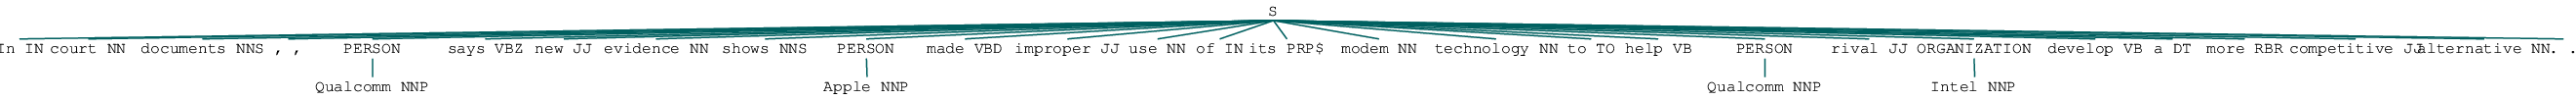

In [304]:
tokenized_sent = tokenize_sentences(list(df.text)[0])
tagged_sents = tag_parts_of_sentences(tokenized_sent)
example = nltk.ne_chunk(tagged_sents[1])
example

In [406]:
tagged_sents

[[('In', 'IN'),
  ('stunning', 'VBG'),
  ('cover', 'NN'),
  ('article', 'NN'),
  ('titled', 'VBD'),
  ('The', 'DT'),
  ('Silence', 'NNP'),
  ('Shepherds', 'NNP'),
  ('magazine', 'NN'),
  ('blasts', 'NNS'),
  ('pope', 'VBP'),
  ('unwillingness', 'JJ'),
  ('answer', 'NN'),
  ('direct', 'JJ'),
  ('questions', 'NNS'),
  ('regarding', 'VBG'),
  ('knew', 'VBD'),
  ('serial', 'JJ'),
  ('homosexual', 'JJ'),
  ('abuse', 'IN'),
  ('U.S.', 'NNP'),
  ('Cardinal', 'NNP'),
  ('Theodore', 'NNP'),
  ('McCarrick', 'NNP'),
  ('knew', 'VBD'),
  ('it', 'PRP'),
  ('.', '.')],
 [('An', 'DT'),
  ('August', 'NNP'),
  ('report', 'NN'),
  ('high-ranking', 'NN'),
  ('Vatican', 'NNP'),
  ('official', 'NN'),
  ('declared', 'VBD'),
  ('pope', 'NN'),
  ('aware', 'JJ'),
  ('McCarricks', 'NNP'),
  ('misdeeds', 'NNS'),
  ('least', 'JJS'),
  ('early', 'JJ'),
  ('since', 'IN'),
  ('official', 'JJ'),
  ('personally', 'RB'),
  ('informed', 'VBN'),
  ('himand', 'NN'),
  ('yet', 'RB'),
  ('lifted', 'VBN'),
  ('sanctions', 'N

In [97]:
def pull_all_subjects(corpus_text):
    main_subject = []
    subject_two = []
    counter = 0
    for document in corpus_text:
        clean_doc = clean_document(document)
        most_freq_nouns = get_frequent_nouns(clean_doc)
        sentences = tokenize_sentences(clean_doc)
        tagged_sentences = tag_parts_of_sentences(sentences)
        entities, top_10_entities = recognize_entities(tagged_sentences)
        all_subject_nouns = subject_nouns(top_10_entities,most_freq_nouns)
        if len(all_subject_nouns) > 0:
            main_subject.append(all_subject_nouns[0])
            print(all_subject_nouns[0])
        else:
            main_subject.append('no_subject_found')
        if len(all_subject_nouns) > 1:
            subject_two.append(all_subject_nouns[1])
            print(all_subject_nouns[1])
        else:
            subject_two.append('one_main_subject')
        counter +=1
        print(counter)
    return main_subject, subject_two

In [309]:
breit_df = (df[(df.source_name == 'Breitbart News')])
clean_doc = clean_document(list(breit_df.text)[1])
freq_nouns = get_frequent_nouns(clean_doc)
tokenized_sent = tokenize_sentences(clean_doc)
tagged_sents = tag_parts_of_sentences(tokenized_sent)
entities, top_10_ent = recognize_entities(tagged_sents)
subj_nouns = subject_nouns(top_10_ent,freq_nouns)
# x = nltk.ne_chunk(tagged_sents[1])

In [354]:
# grammar = "NP: {<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}"
# cp = nltk.RegexpParser(grammar)
# # results = cp.parse(tagged_sents)
# all_opinions=[]
# for tagged_sentence in tagged_sents:
#     result = cp.parse(tagged_sentence)
#     if type(result) == nltk.tree.Tree:
#         sentence_words = []
#         for word in result:
#             sentence_words.append(word[0])
#         all_opinions.append(' '.join(sentence_words))

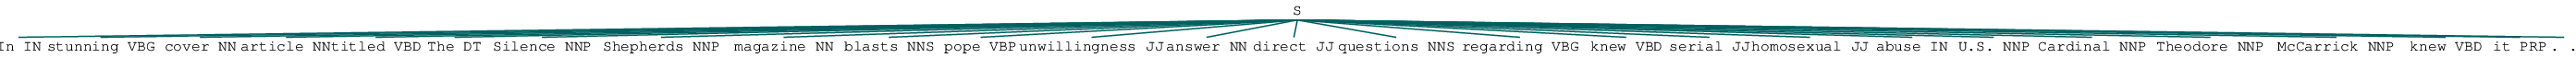

In [360]:
result = cp.parse(tagged_sents[0])
result

In [312]:
from nltk import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger
nltk.download('conll2000')
nltk.download('treebank')
train_sents = nltk.corpus.brown.tagged_sents()
train_sents += nltk.corpus.conll2000.tagged_sents()
train_sents += nltk.corpus.treebank.tagged_sents()
# Create instance of SubjectTrigramTagger
t0 = DefaultTagger('NN')
t1 = UnigramTagger(train_sents, backoff=t0)
t2 = BigramTagger(train_sents, backoff=t1)
trigram_tagger = TrigramTagger(train_sents, backoff=t2)

[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [322]:
def tag_relevant_sentences(subject, clean_document):
    sentences = tokenize_sentences(clean_document)
    sentences = [sentence for sentence in sentences if subject in
                [word for word in sentence]]
    tagged_sents = [trigram_tagger.tag(sent) for sent in sentences]
    return tagged_sents

def get_svo(sentence, subject):
    subject_idx = next((i for i, v in enumerate(sentence)
                    if v[0] == subject), None)
    data = {'subject': subject}
    for i in range(subject_idx, len(sentence)):
        found_action = False
        for j, (token, tag) in enumerate(sentence[i+1:]):
            if tag in VERBS:
                data['action'] = token
                found_action = True
            if tag in NOUNS and found_action == True:
                data['object'] = token
                data['phrase'] = sentence[i: i+j+2]
                return data
    return {}



In [104]:
def box_plots(data, metric, title, sources_toshow_int):
    plot_data = []
    for source in (list(df.source_name.value_counts().index))[:sources_toshow_int]:
        plot_data.append(data[metric][(data.source_name == source)])
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 20)
    ax.set_title("Distribution of Outlet's article "+title, fontsize=40)
    c = 'blue'
    ax.boxplot(plot_data)
    ax.set_xticklabels((list(df.source_name.value_counts().index))[:sources_toshow_int])
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.show()

In [157]:
# from gensim.models import KeyedVectors
# # load the google word2vec model
# filename = '../Google_w2v/GoogleNews-vectors-negative300.bin'
# modelG = KeyedVectors.load_word2vec_format(filename, binary=True)


def create_word2vec_embeddings(data_frame):
    list_topics = []
    all_vectors = []
    main = list(data_frame.main_subject)
    second = list(data_frame.sub_topic)
    main.extend(second)
    all_topics = list(set(main))
    for topic in all_topics:
        try:
            if type(modelG.vocab[topic]) == gensim.models.keyedvectors.Vocab:
                vector = modelG.get_vector(topic)
                kv_pair = {topic:vector}
                list_topics.append(topic)
                all_vectors.append(vector)
                print('Vectorized '+topic)
        except KeyError:
            print(topic+' not in Google Vocab')
            continue          
    return pd.DataFrame(all_vectors,index=list_topics)
        
#      except KeyError:
#          continue

In [387]:
# main_subjects, sub_topics = pull_all_subjects(df.text)

In [248]:
df['main_subject'] = main_subjects
df['sub_topic'] = sub_topics

In [249]:
df.main_subject = df.main_subject.replace(' ', '_', regex=True)

In [250]:
df.sub_topic = df.sub_topic.replace(' ', '_', regex=True)

In [252]:
df = df[(~df.main_subject.isin(['National_Review','BuzzFeed','CBC']))]

In [524]:
df

,author,content,description,publishedAt,source_id,source_name,text,title,url,urlToImage,neg,neu,pos,compound,subjectivity,main_subject,sub_topic
0,John Gruber,"In a filing late Monday, Qualcomm seeks to amend a California state breach-of-contract suit, saying that documents provided by Apple support its belief that the company misused company trade secrets. Although discovery is ongoing, it is clear that Apple's con… [+1957 chars]",Qualcomm is seeking permission to update a lawsuit with the new allegations.,2018-09-25T22:20:47Z,axios,Axios,"The most high-stakes legal battle in tech just got even juicer. In court documents, Qualcomm says new evidence shows Apple made improper use of its modem technology to help Qualcomm rival Intel develop a more competitive alternative. Why it matters: Apple and Qualcomm were already locked in a bitter, global court battle. Both companies are behemoths used to getting their way in business dealings and their face-off has been epic. In a filing late Monday, Qualcomm seeks to amend a California state breach-of-contract suit, saying that documents provided by Apple support its belief that the company misused company trade secrets. The original breach of contract claim was focused on an allegation that Apple had not allowed Qualcomm to audit the iPhone maker's use of Qualcomm's trade secret...",Qualcomm Says Apple Gave Its Trade Secrets to Intel,https://www.axios.com/qualcomm-says-apple-gave-its-trade-secrets-to-intel-6b85fffe-20b6-463f-824e-e8dcc34ae465.html,https://images.axios.com/cTxitn9J6nfZ4l-hPmZLGPe1MgM=/0x0:1920x1080/1920x1080/2018/09/25/1537880016878.jpg,0.076,0.841,0.082,0.0757,0.399179,Qualcomm,Apple
1,NaN,"In a move that could prompt more companies to offer paid parental leave, Microsoft is announcing today that it will require all of its U.S.-based suppliers and vendors with more than 50 employees to offer such benefits. Why it matters : Many leading companies… [+1538 chars]",It hopes to spur more companies to offer such benefits,2018-08-30T15:45:10Z,axios,Axios,"In a move that could prompt more companies to offer paid parental leave, Microsoft is announcing today that it will require all of its U.S.-based suppliers and vendors with more than 50 employees to offer such benefits. Why it matters: Many leading companies offer paid leave, but others need a push. History shows that when progressive companies require benefits or policies from their suppliers, it can help increase adoption. Microsoft's move alone will mean many thousands of new workers getting paid parental leave, as the company has more than 1,000 partners in the U.S. Some states already have laws offering or mandating paid parental leave, including California. Microsoft's home state of Washington has also enacted paid parental leave that will go into effect in 2020. ""As we looked at...",Microsoft will require suppliers to offer paid parental leave,https://www.axios.com/microsoft-require-suppliers-offer-paid-parental-leave-dc573198-123c-4c51-ab78-432863003165.html,https://images.axios.com/oUUnQqJ_uYKpWjzXtxvh1TyyaDw=/0x199:3196x1997/1920x1080/2018/08/30/1535605527147.jpg,0.041,0.831,0.128,0.9871,0.419904,Microsoft,Washington
2,NaN,"The first outward sign of trouble came in August 2017, when co-founder Mamoon Hamid left to join rival venture capital firm Kleiner Perkins. It was Hamid who led the Slack deal, and many of Social Capital's limited partners viewed him as the firm's ""top rainm… [+4615 chars]","All fingers are pointing at Chamath Palihapitiya, who isn't talking.",2018-09-07T13:21:06Z,axios,Axios,"Social Capital arrived in Silicon Valley seven years ago with a charismatic co-founder, former Facebook executive Chamath Palihapitiya who also owns a piece of the Golden State Warriors. It raised more than $1 billion and made early bets on companies like Slack. Why it matters: The firm is imploding and nine sources blame Palihapitiya for its demise. Here is Silicon Valley's Icarus story. The first outward sign of troub

In [255]:
df.to_csv('../Archive_CSV/data_with_subjects.csv')

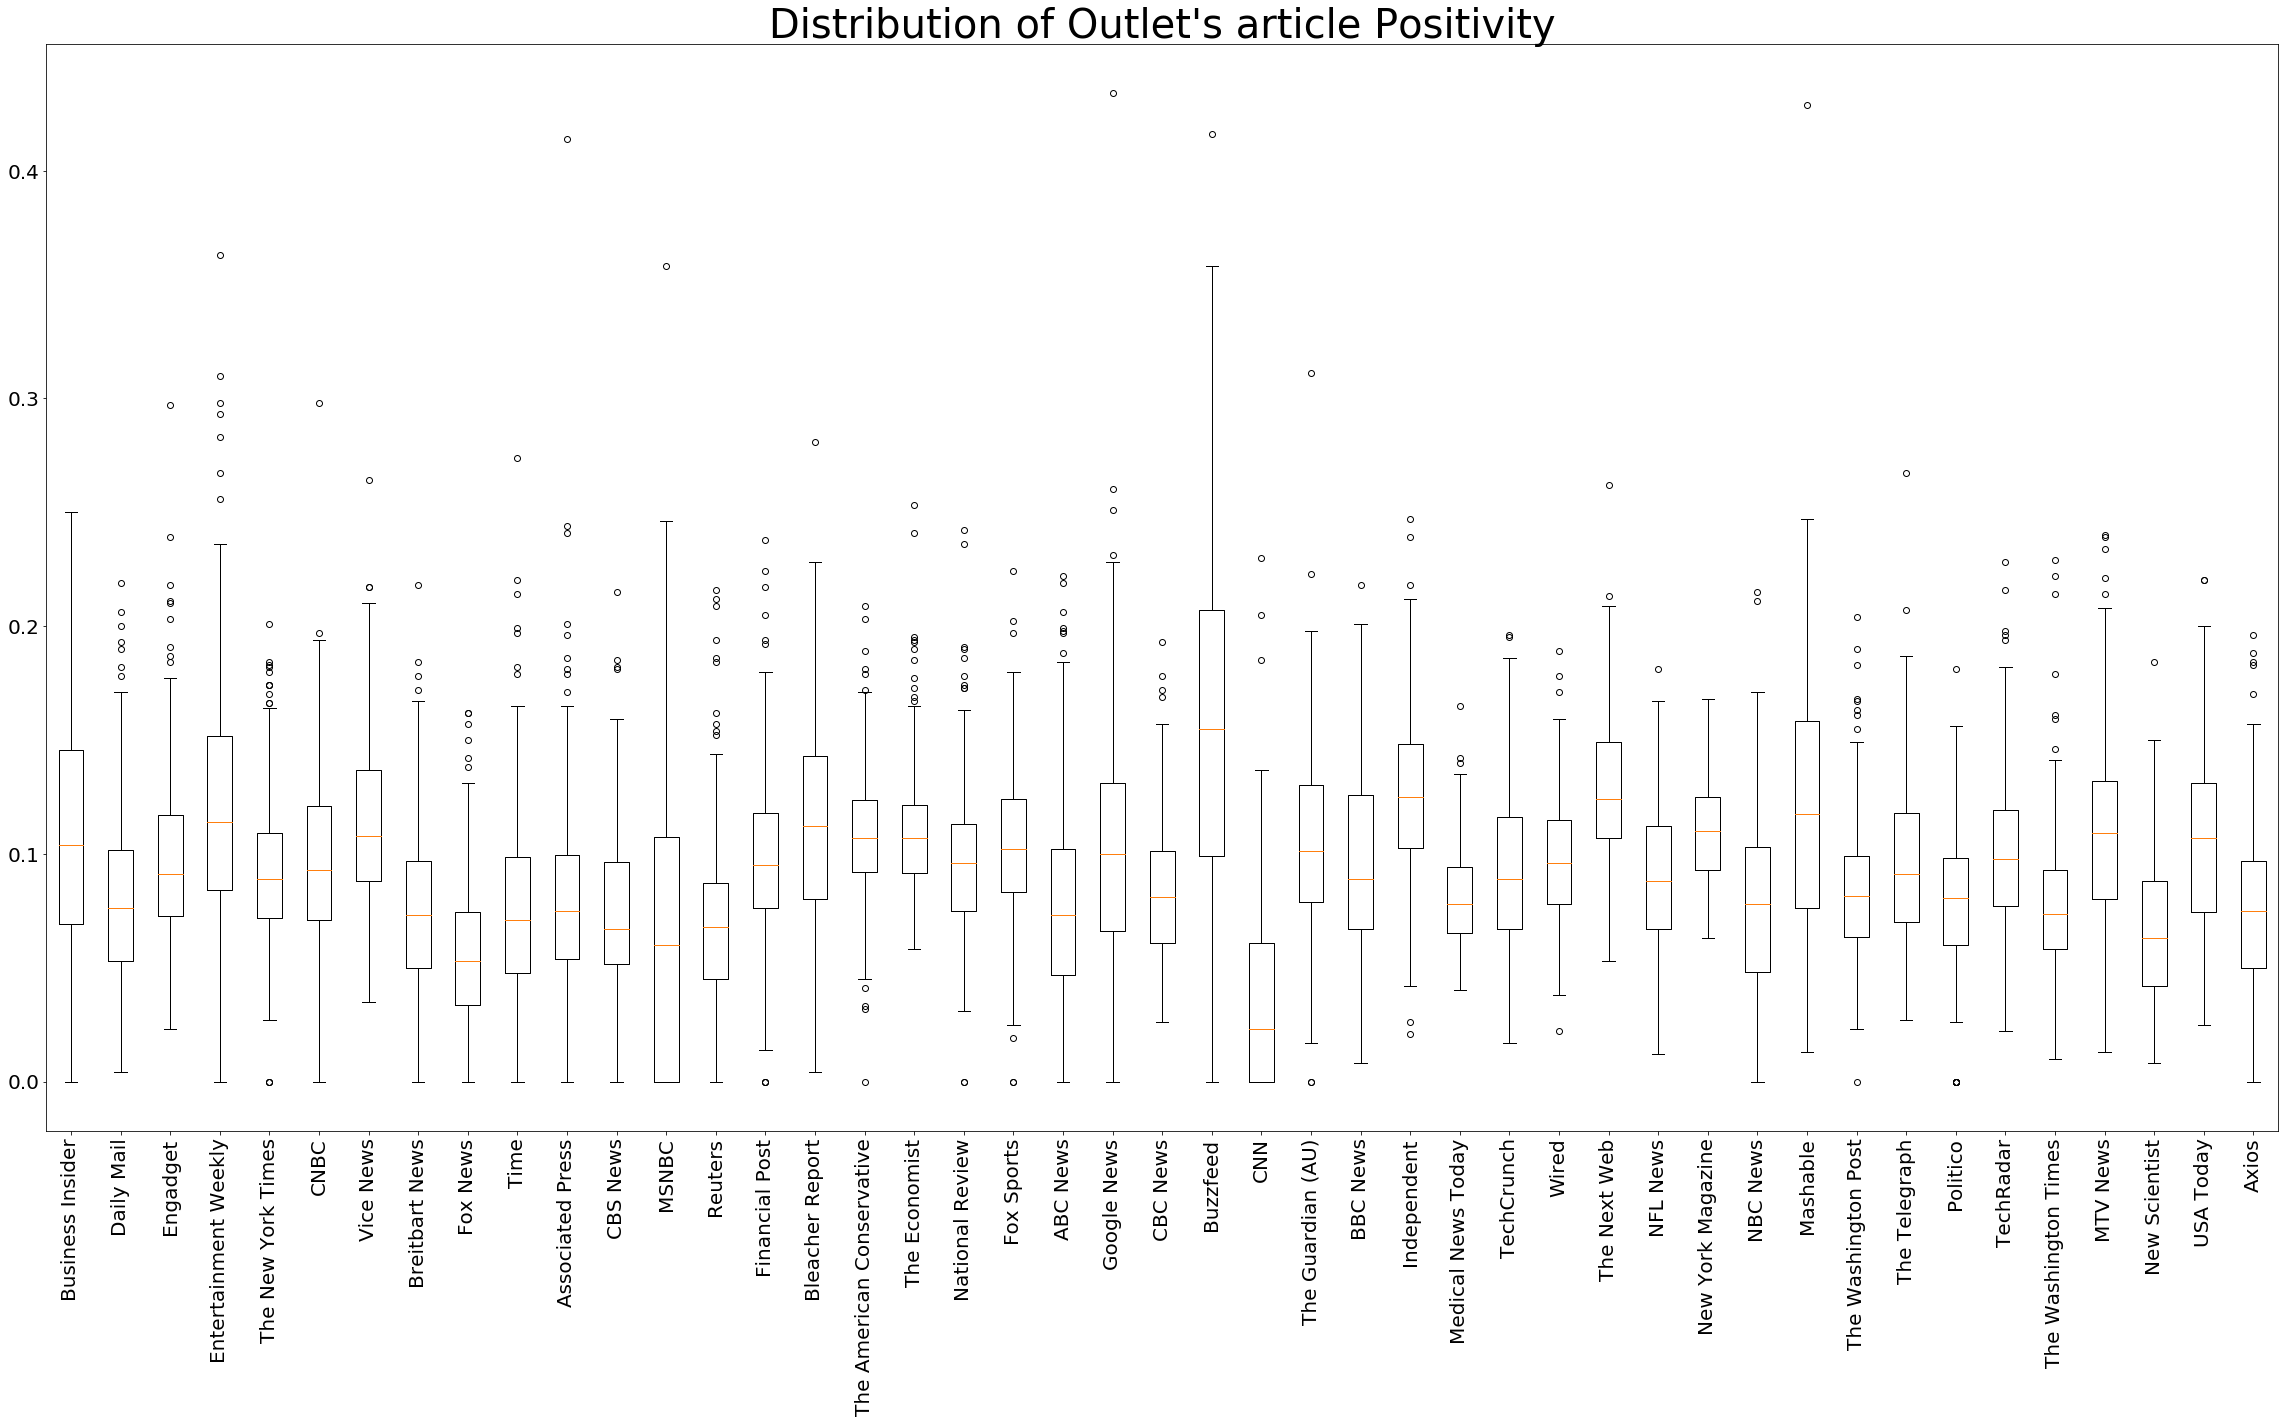

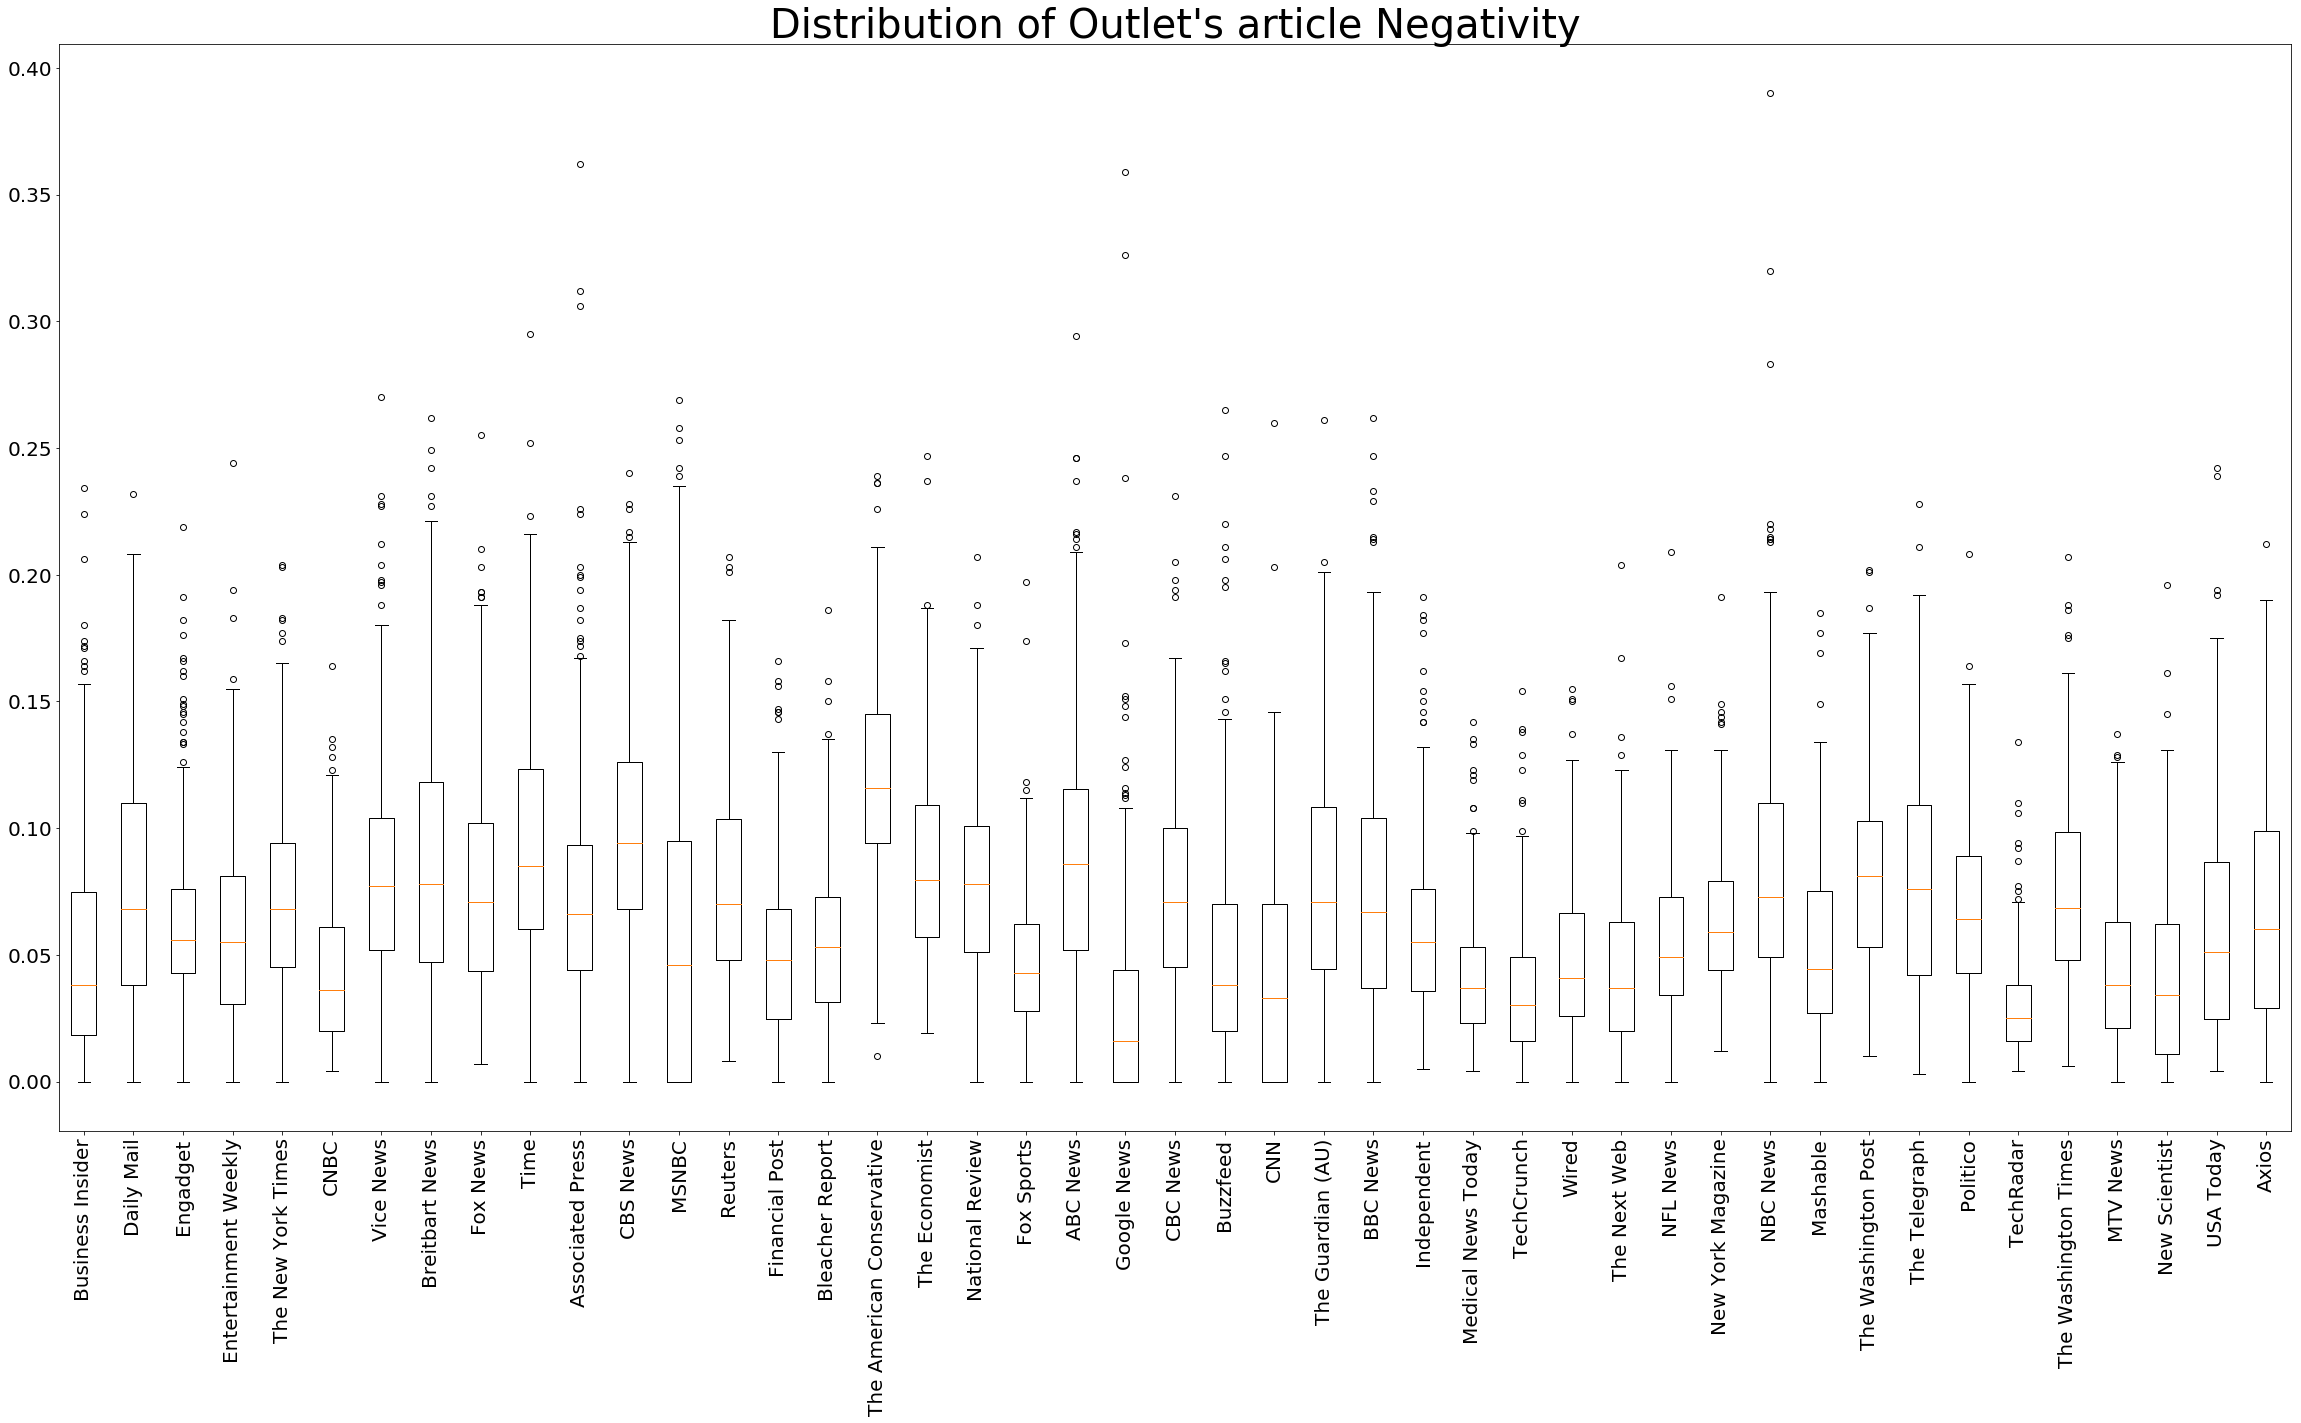

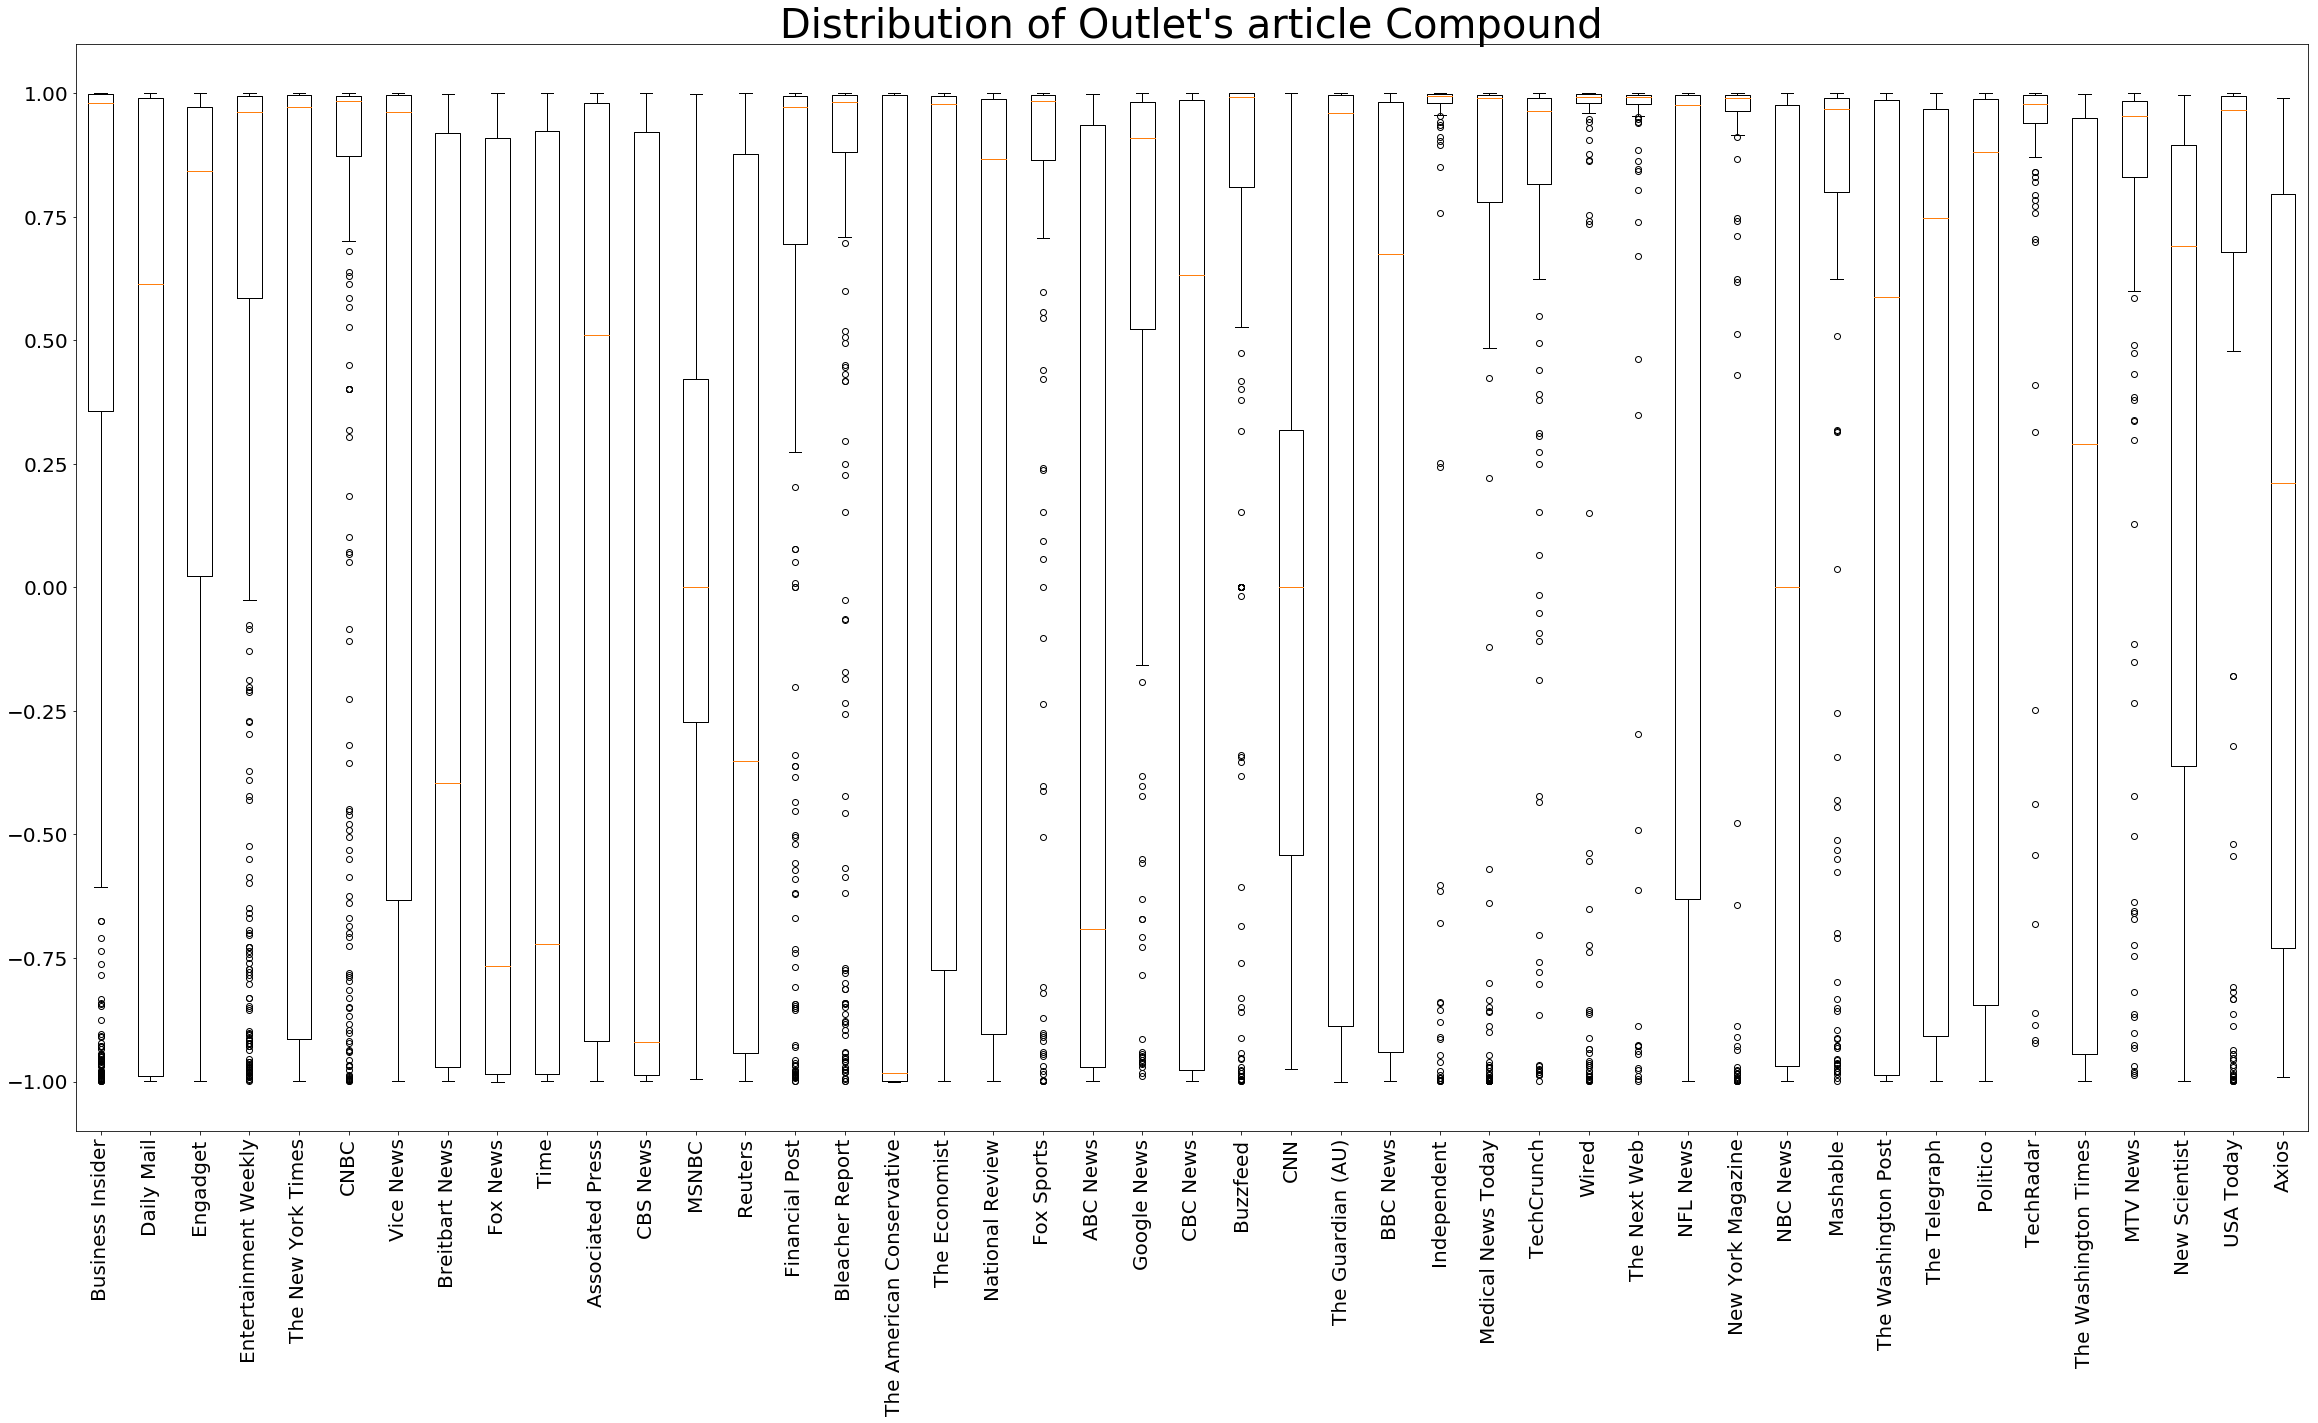

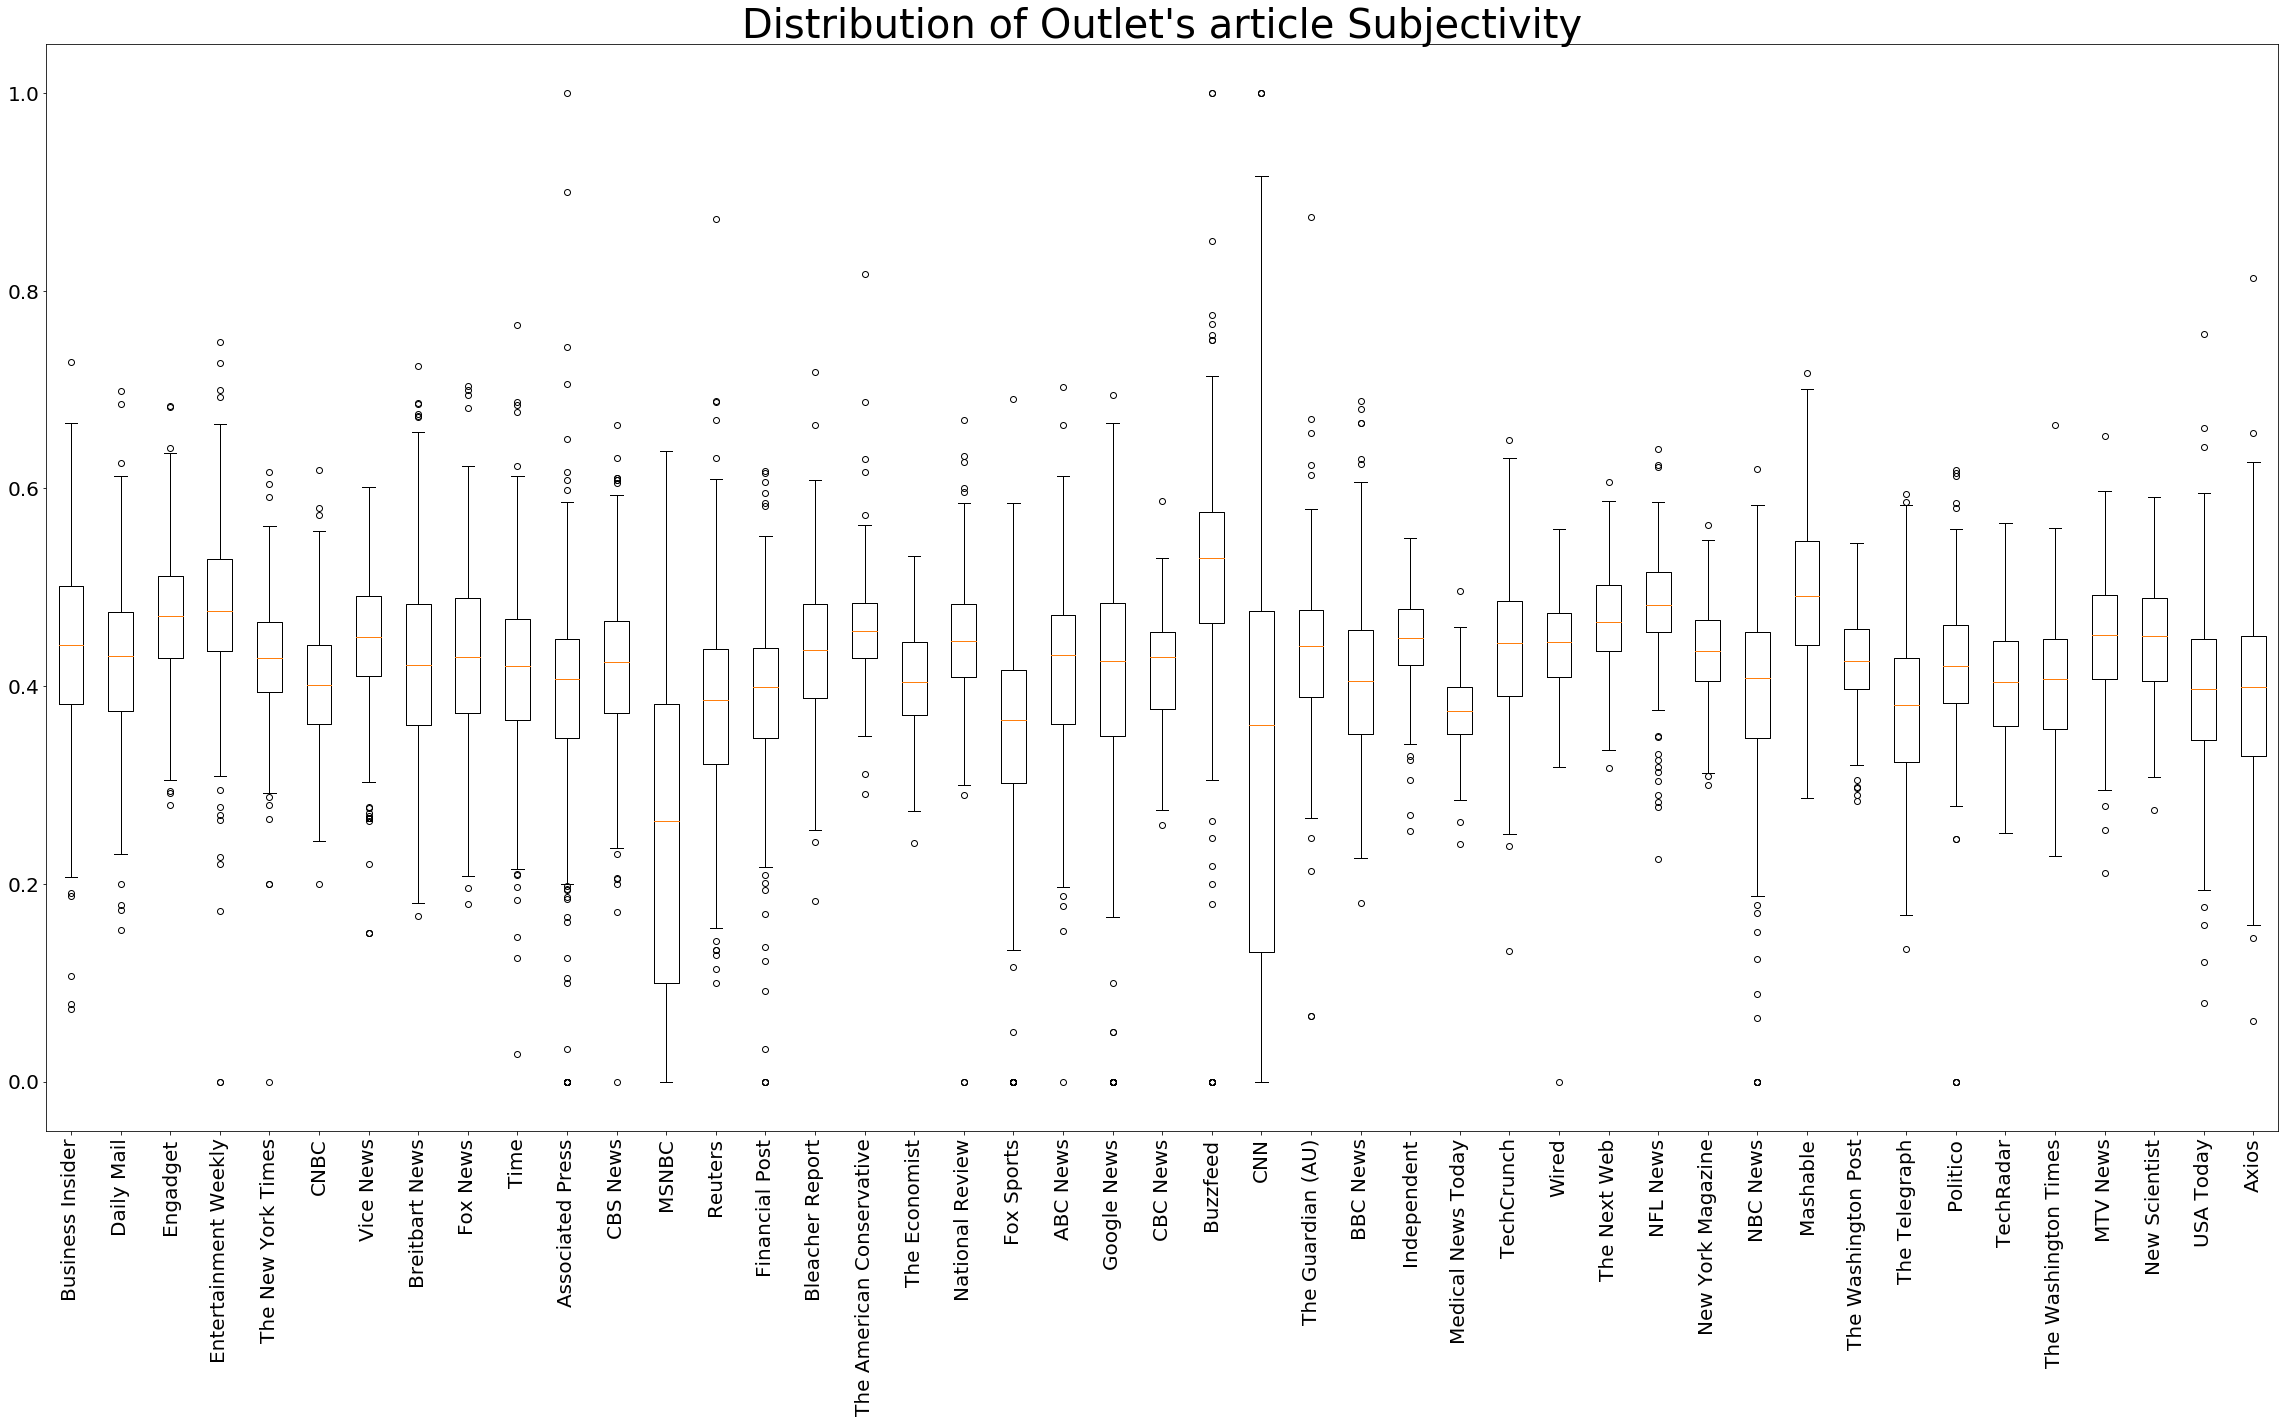

In [256]:
box_plots(df,'pos','Positivity', 45)
box_plots(df,'neg','Negativity', 45)
box_plots(df,'compound','Compound', 45)
box_plots(df,'subjectivity','Subjectivity', 45)

In [390]:
vectorized_topics.to_csv('../Archive_CSV/vectorized_topics.csv')

In [629]:
subjects.index

Index(['Trump', 'U.S.', 'Senate', 'Set', 'China', 'Amazon', 'updateSize',
       'Canada', 'Google', 'FBI',
       ...
       'Putin', 'Maduro', 'NBC', 'Toronto', 'VICE', 'Djokovic', 'Stocks',
       'Martinez', 'Turkey', 'Flynn'],
      dtype='object', length=199)

In [631]:
vectorized_topics.index

TypeError: index() takes at least 1 argument (0 given)

In [622]:
from sklearn.cluster import KMeans

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [696]:
# vectorized_topics = vectorized_topics.drop('cluster',axis=1)
k_means = KMeans(n_clusters = 5)
k_means.fit(vectorized_topics)
y_hat = k_means.predict(vectorized_topics)

In [697]:
from sklearn import metrics
labels = k_means.labels_

metrics.silhouette_score(vectorized_topics, labels, metric='euclidean')

-0.027454955663048432

In [698]:
metrics.calinski_harabaz_score(vectorized_topics, labels)  

93.33486923676828

In [699]:
y_hat

array([2, 0, 3, ..., 4, 3, 0], dtype=int32)

In [700]:
vectorized_topics['cluster'] = y_hat

In [701]:
vectorized_topics.to_csv('../Archive_CSV/vectorized_topics.csv')

In [702]:
# plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_
k_means.fit_predict
# plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

<bound method KMeans.fit_predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

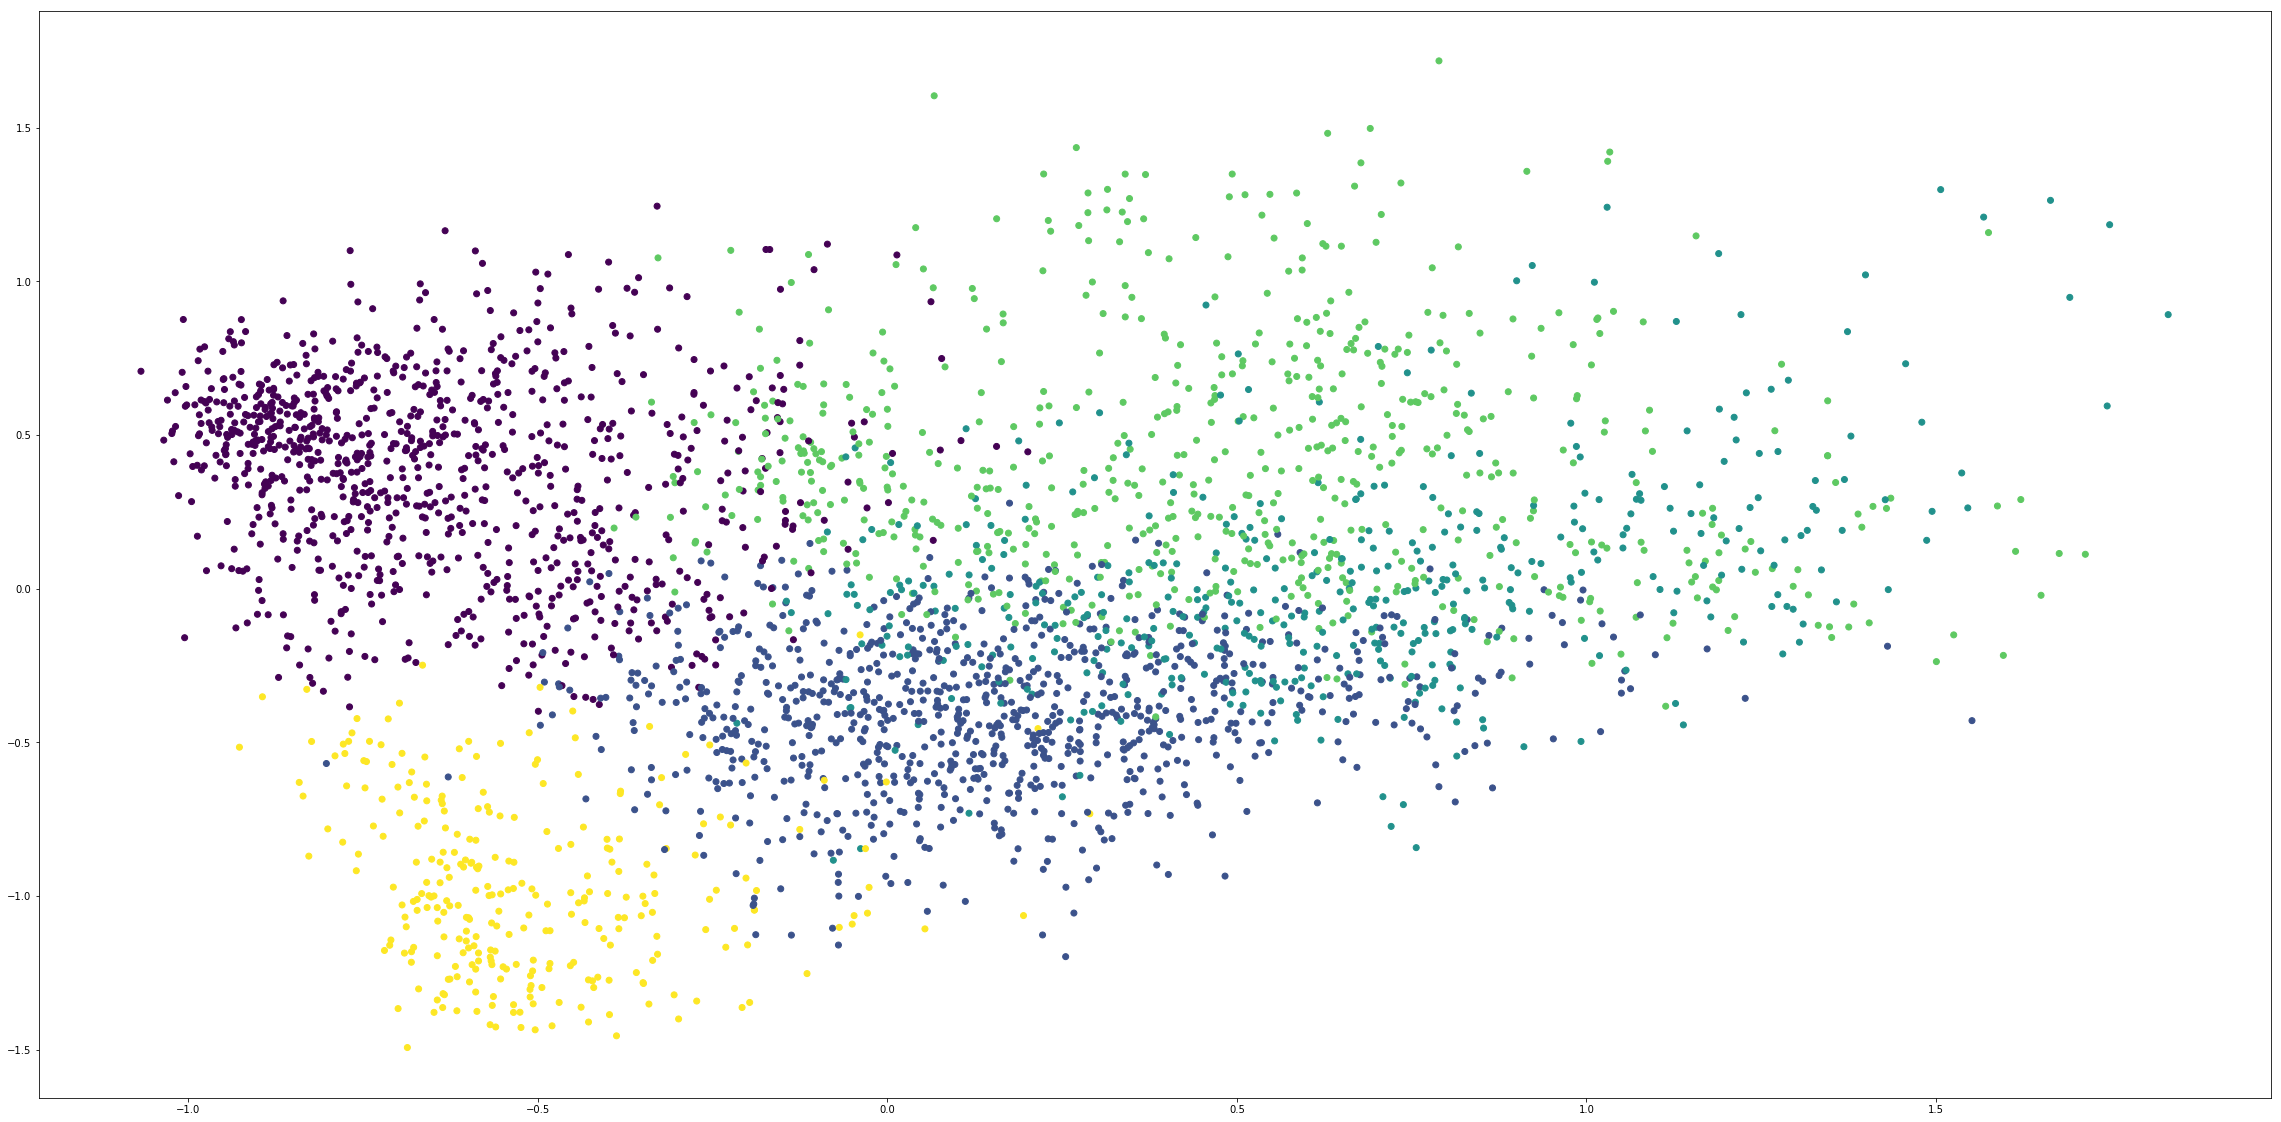

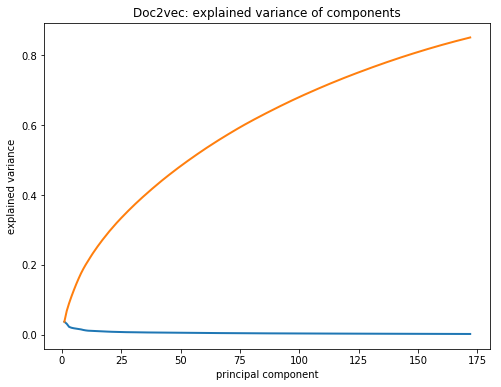

In [703]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

vectorized_topics = pd.read_csv('../Archive_CSV/vectorized_topics.csv',index_col=0)
subjects = df.main_subject.value_counts()
adjust_vecs = vectorized_topics[(vectorized_topics.index.isin(list(subjects.index)))]

X = adjust_vecs.iloc[:,:300]
pca = PCA(n_components=172)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
ax.scatter(result[:, 0], result[:, 1], c=adjust_vecs.cluster)
words = list(adjust_vecs.index)
# for i, word in enumerate(words):
#     text = ax.annotate(word, xy=(result[i, 0], result[i, 1]))
#     text.set_fontsize(20)
x_values = range(1, pca.n_components_+1)
ratio = pca.explained_variance_ratio_
def plot_explained_variance(total_features,exp_variance_ratio):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(total_features, exp_variance_ratio, lw=2, label='explained variance')
    ax.plot(total_features, np.cumsum(exp_variance_ratio), lw=2, label='cumulative explained variance')
    ax.set_title('Doc2vec: explained variance of components')
    ax.set_xlabel('principal component')
    ax.set_ylabel('explained variance')
    plt.show()
plot_explained_variance(x_values,ratio)

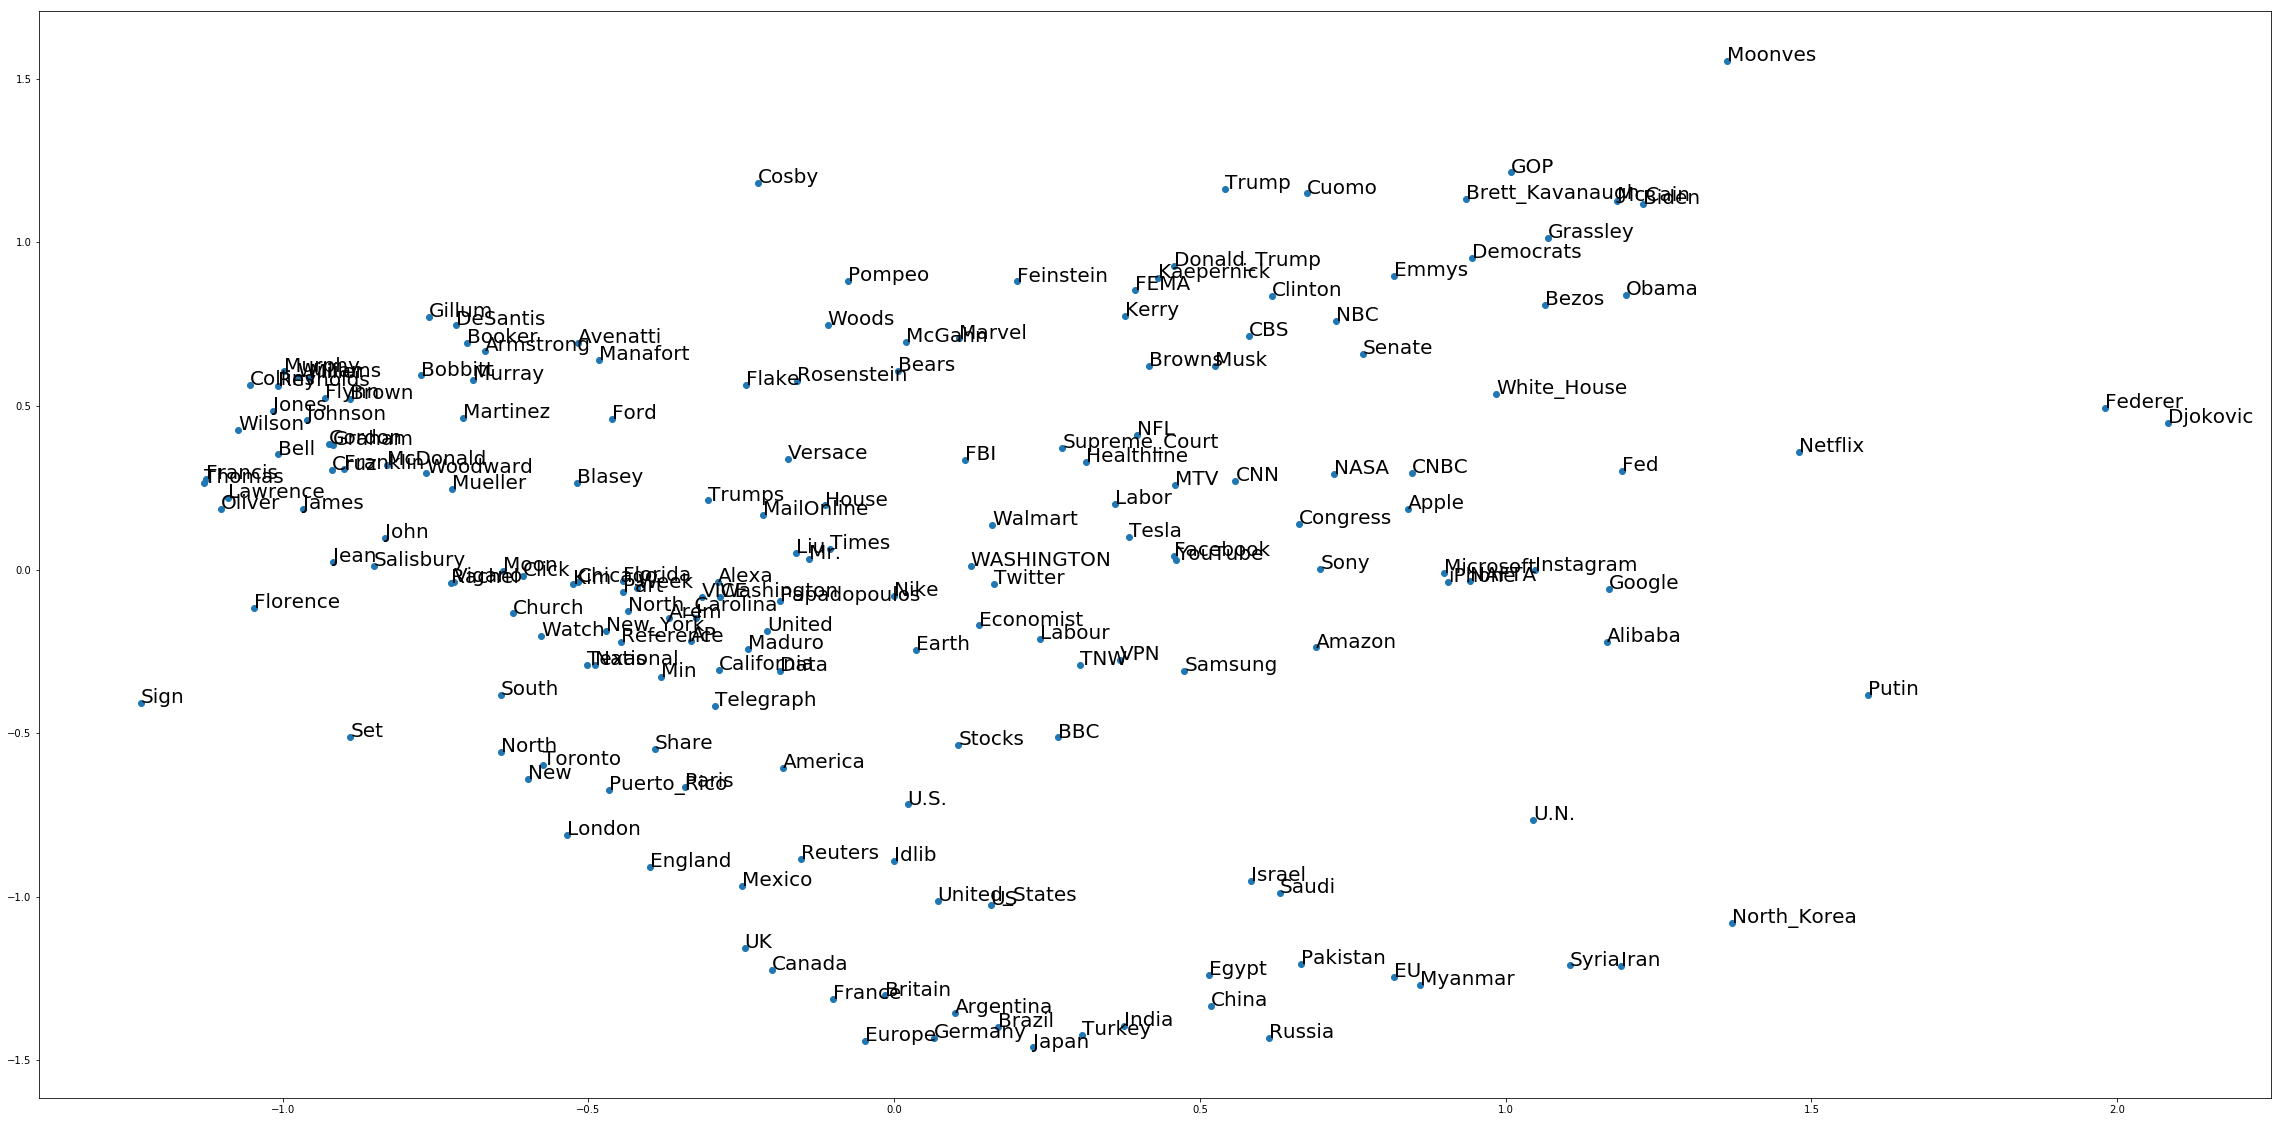

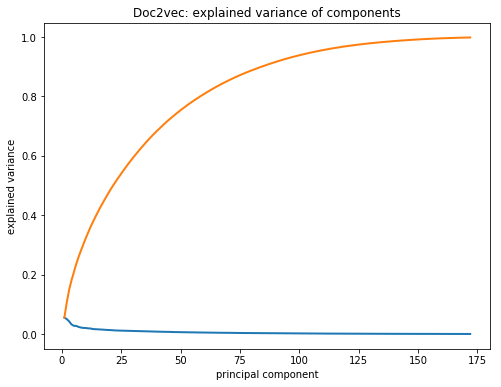

In [632]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

vectorized_topics = pd.read_csv('../Archive_CSV/vectorized_topics.csv',index_col=0)
subjects = df.main_subject.value_counts()[1:200]
adjust_vecs = vectorized_topics[(vectorized_topics.index.isin(list(subjects.index)))]

X = adjust_vecs
pca = PCA(n_components=172)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
ax.scatter(result[:, 0], result[:, 1])
words = list(adjust_vecs.index)
for i, word in enumerate(words):
    text = ax.annotate(word, xy=(result[i, 0], result[i, 1]))
    text.set_fontsize(20)
x_values = range(1, pca.n_components_+1)
ratio = pca.explained_variance_ratio_
def plot_explained_variance(total_features,exp_variance_ratio):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(total_features, exp_variance_ratio, lw=2, label='explained variance')
    ax.plot(total_features, np.cumsum(exp_variance_ratio), lw=2, label='cumulative explained variance')
    ax.set_title('Doc2vec: explained variance of components')
    ax.set_xlabel('principal component')
    ax.set_ylabel('explained variance')
    plt.show()
plot_explained_variance(x_values,ratio)

In [637]:
np.shape(cl_centers)

(7, 300)

In [239]:
df = df[(~df.main_subject.isin(['National_Review','BuzzFeed','CBC']))]

In [240]:
df = df.reset_index(drop=True)

In [244]:
df.to_csv('../Archive_CSV/data_with_subjects.csv')

In [245]:
subjects = df.sub_topic.value_counts()[1:10]

In [262]:
# def plot_metrics_vs_topics(metric)
def plot_metrics_vs_topics(data, metric, title, sources_toshow_int, subject):
    plot_data = []
    for source in (list(df.source_name.value_counts().index))[:sources_toshow_int]:
        plot_data.append(data[metric][(data.source_name == source) & ((data.main_subject == subject)|(data.sub_topic == subject))])
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 20)
    ax.set_title("Distribution of Outlet's article "+title + ' for Topic of '+subject, fontsize=40)
    c = 'blue'
    ax.boxplot(plot_data)
    ax.set_xticklabels((list(df.source_name.value_counts().index))[:sources_toshow_int])
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.show()

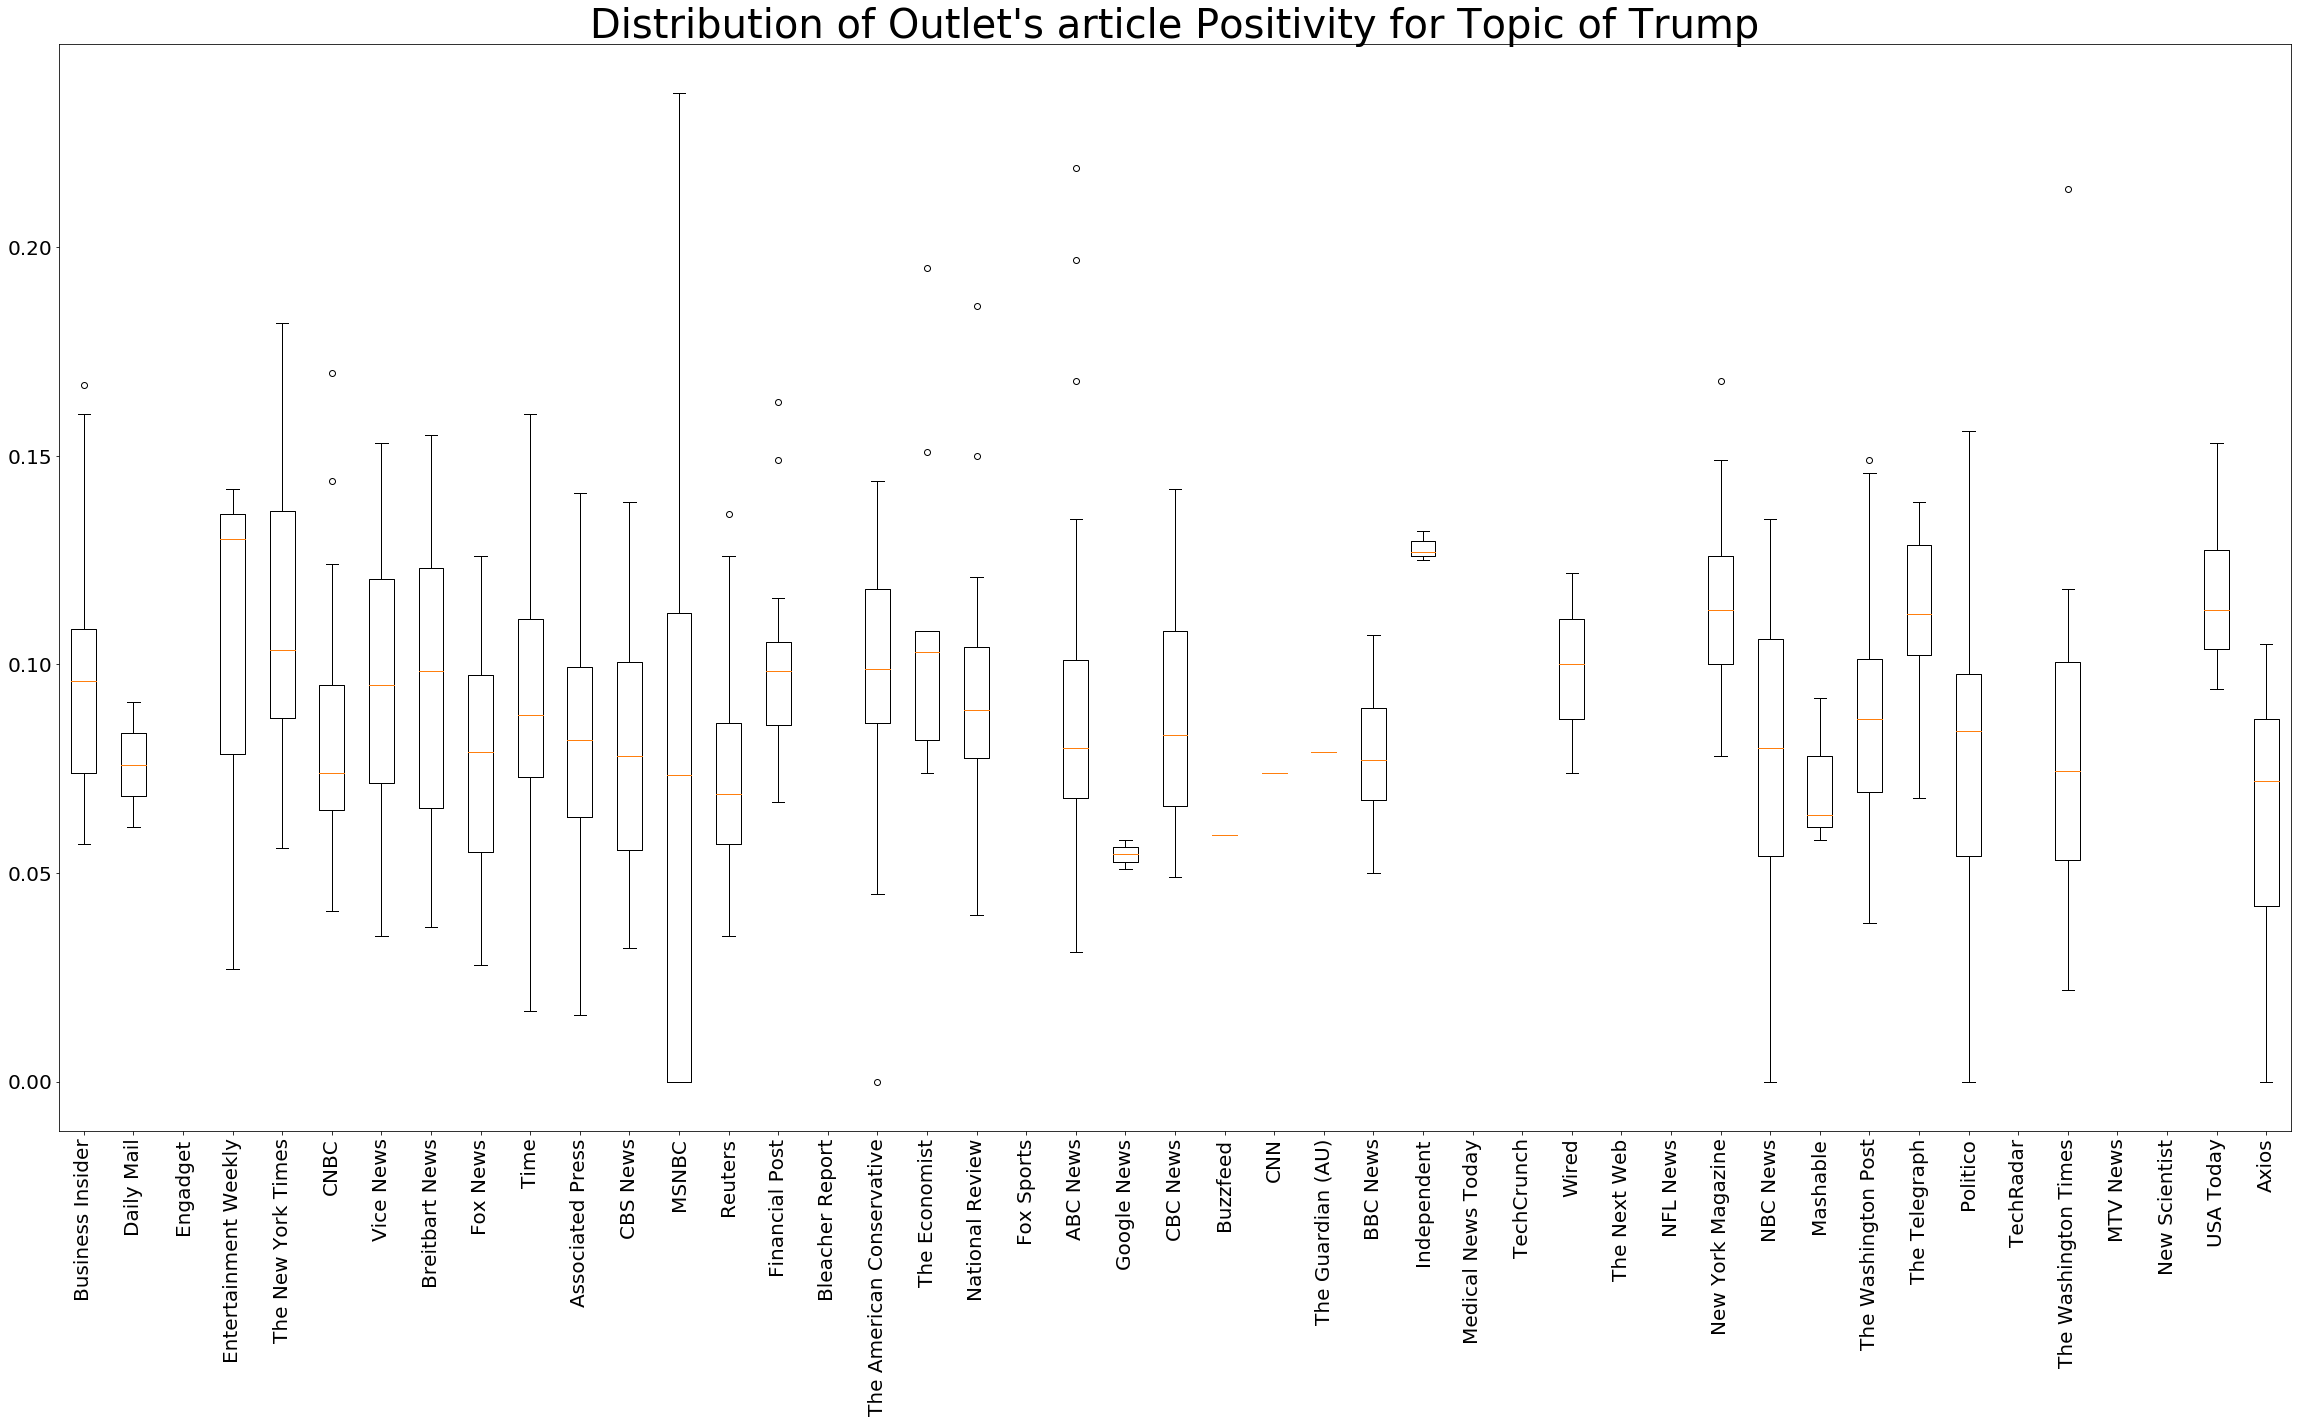

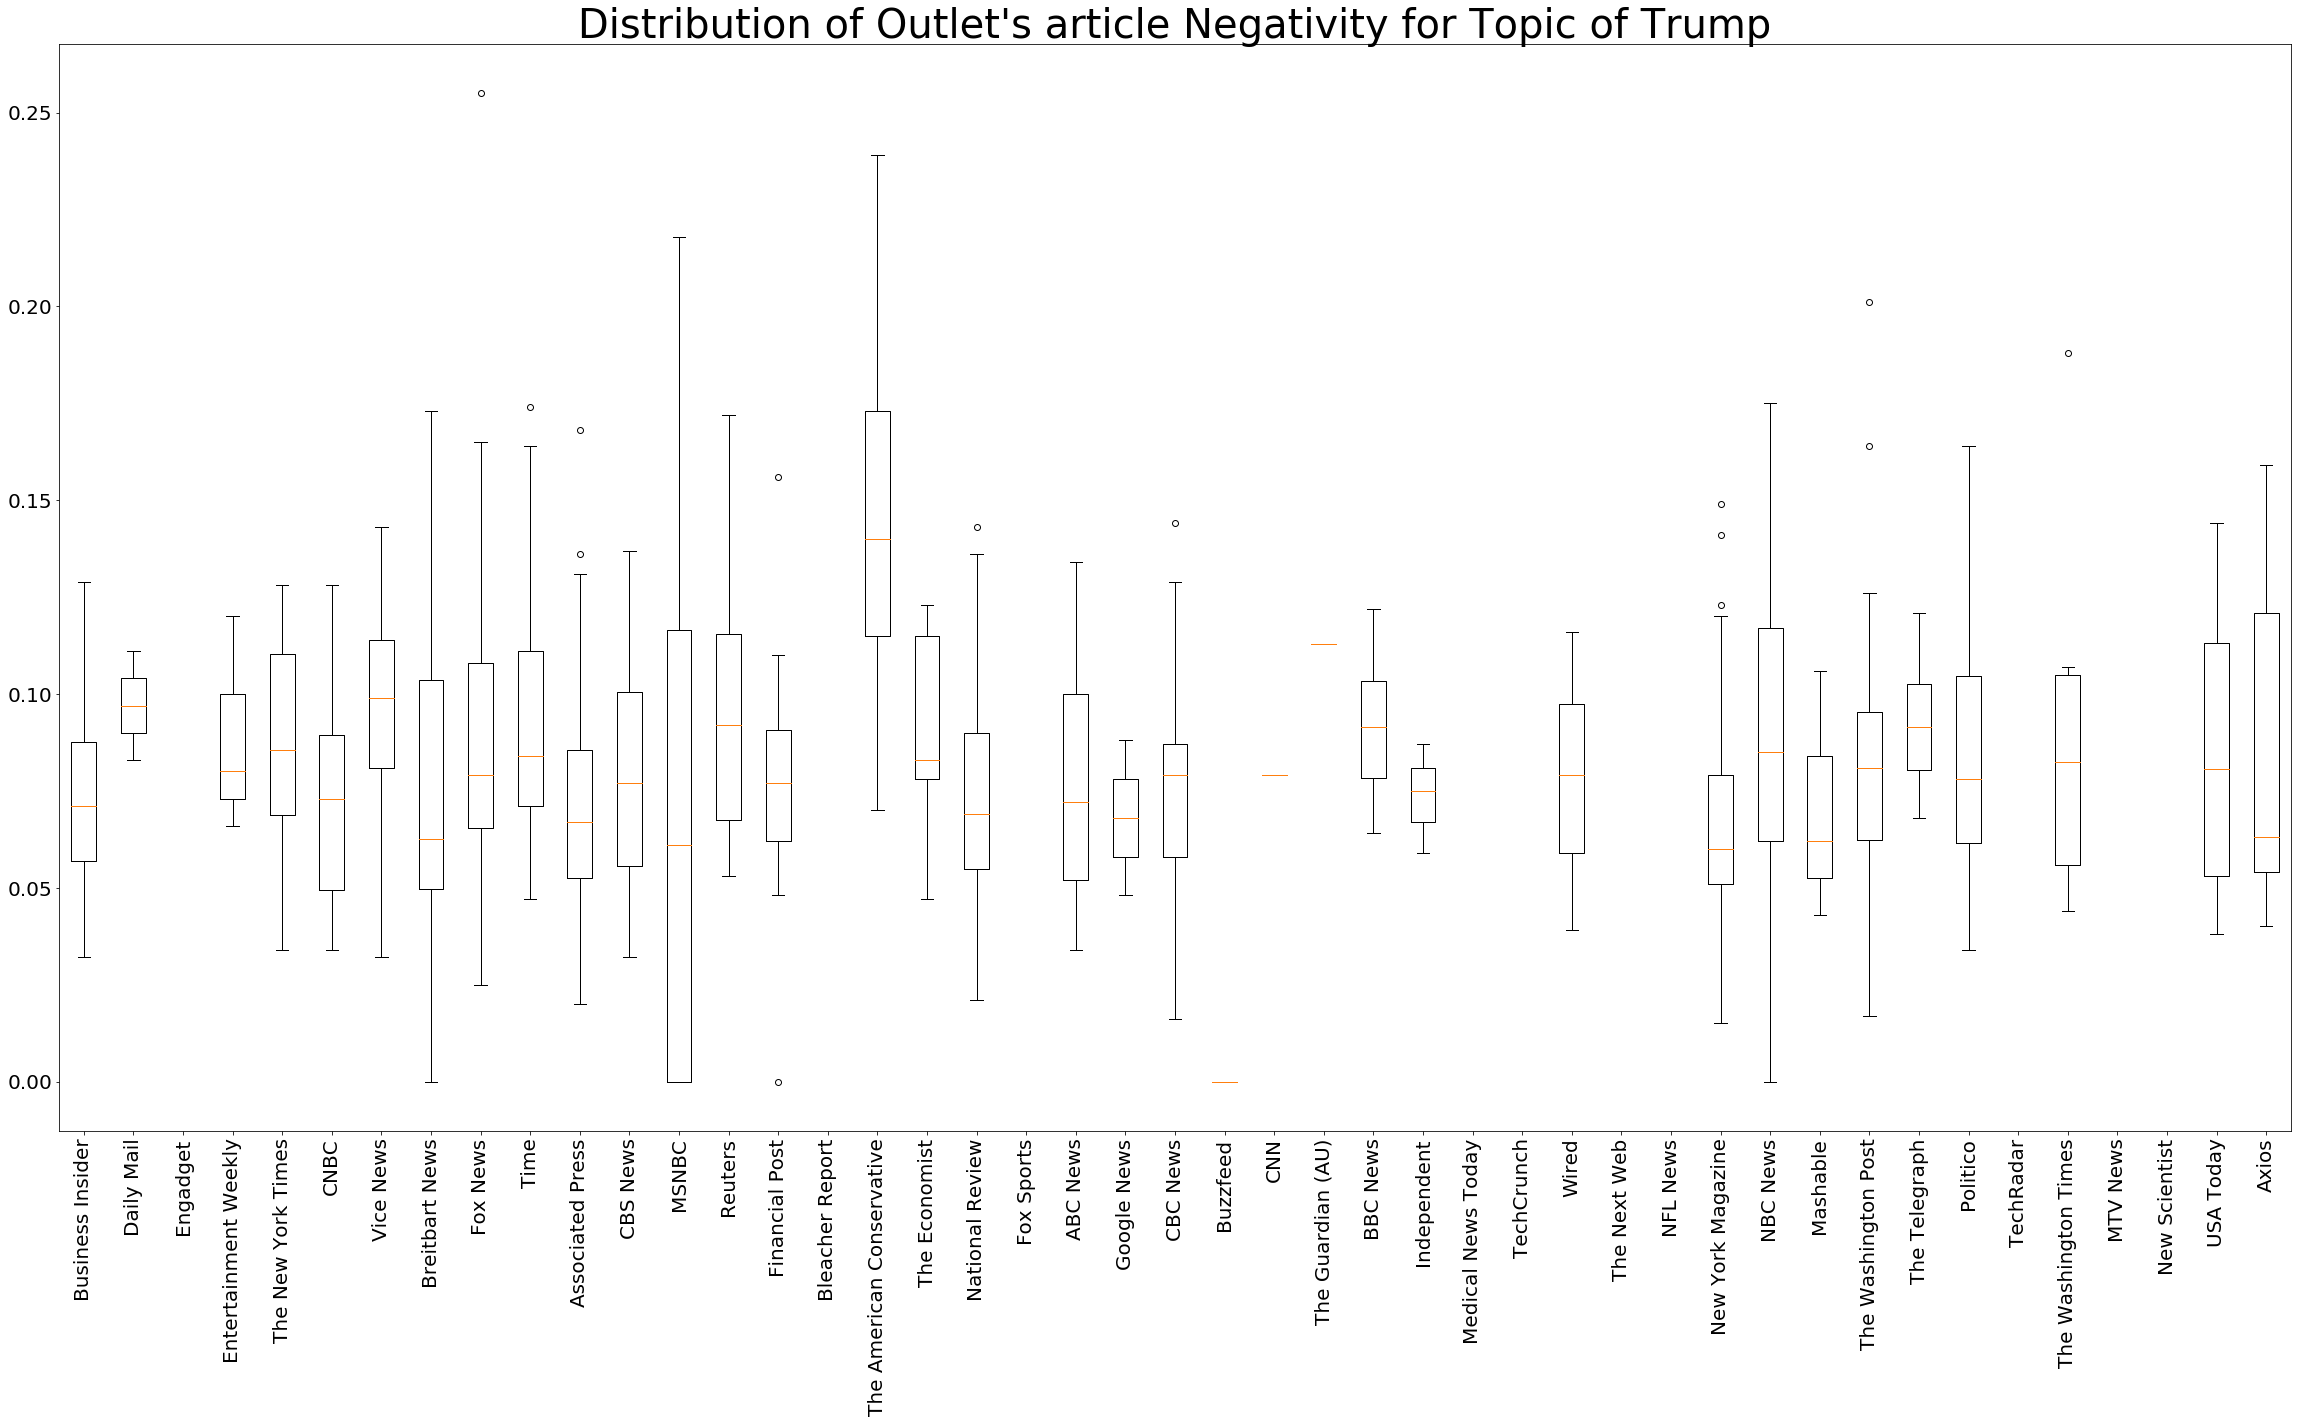

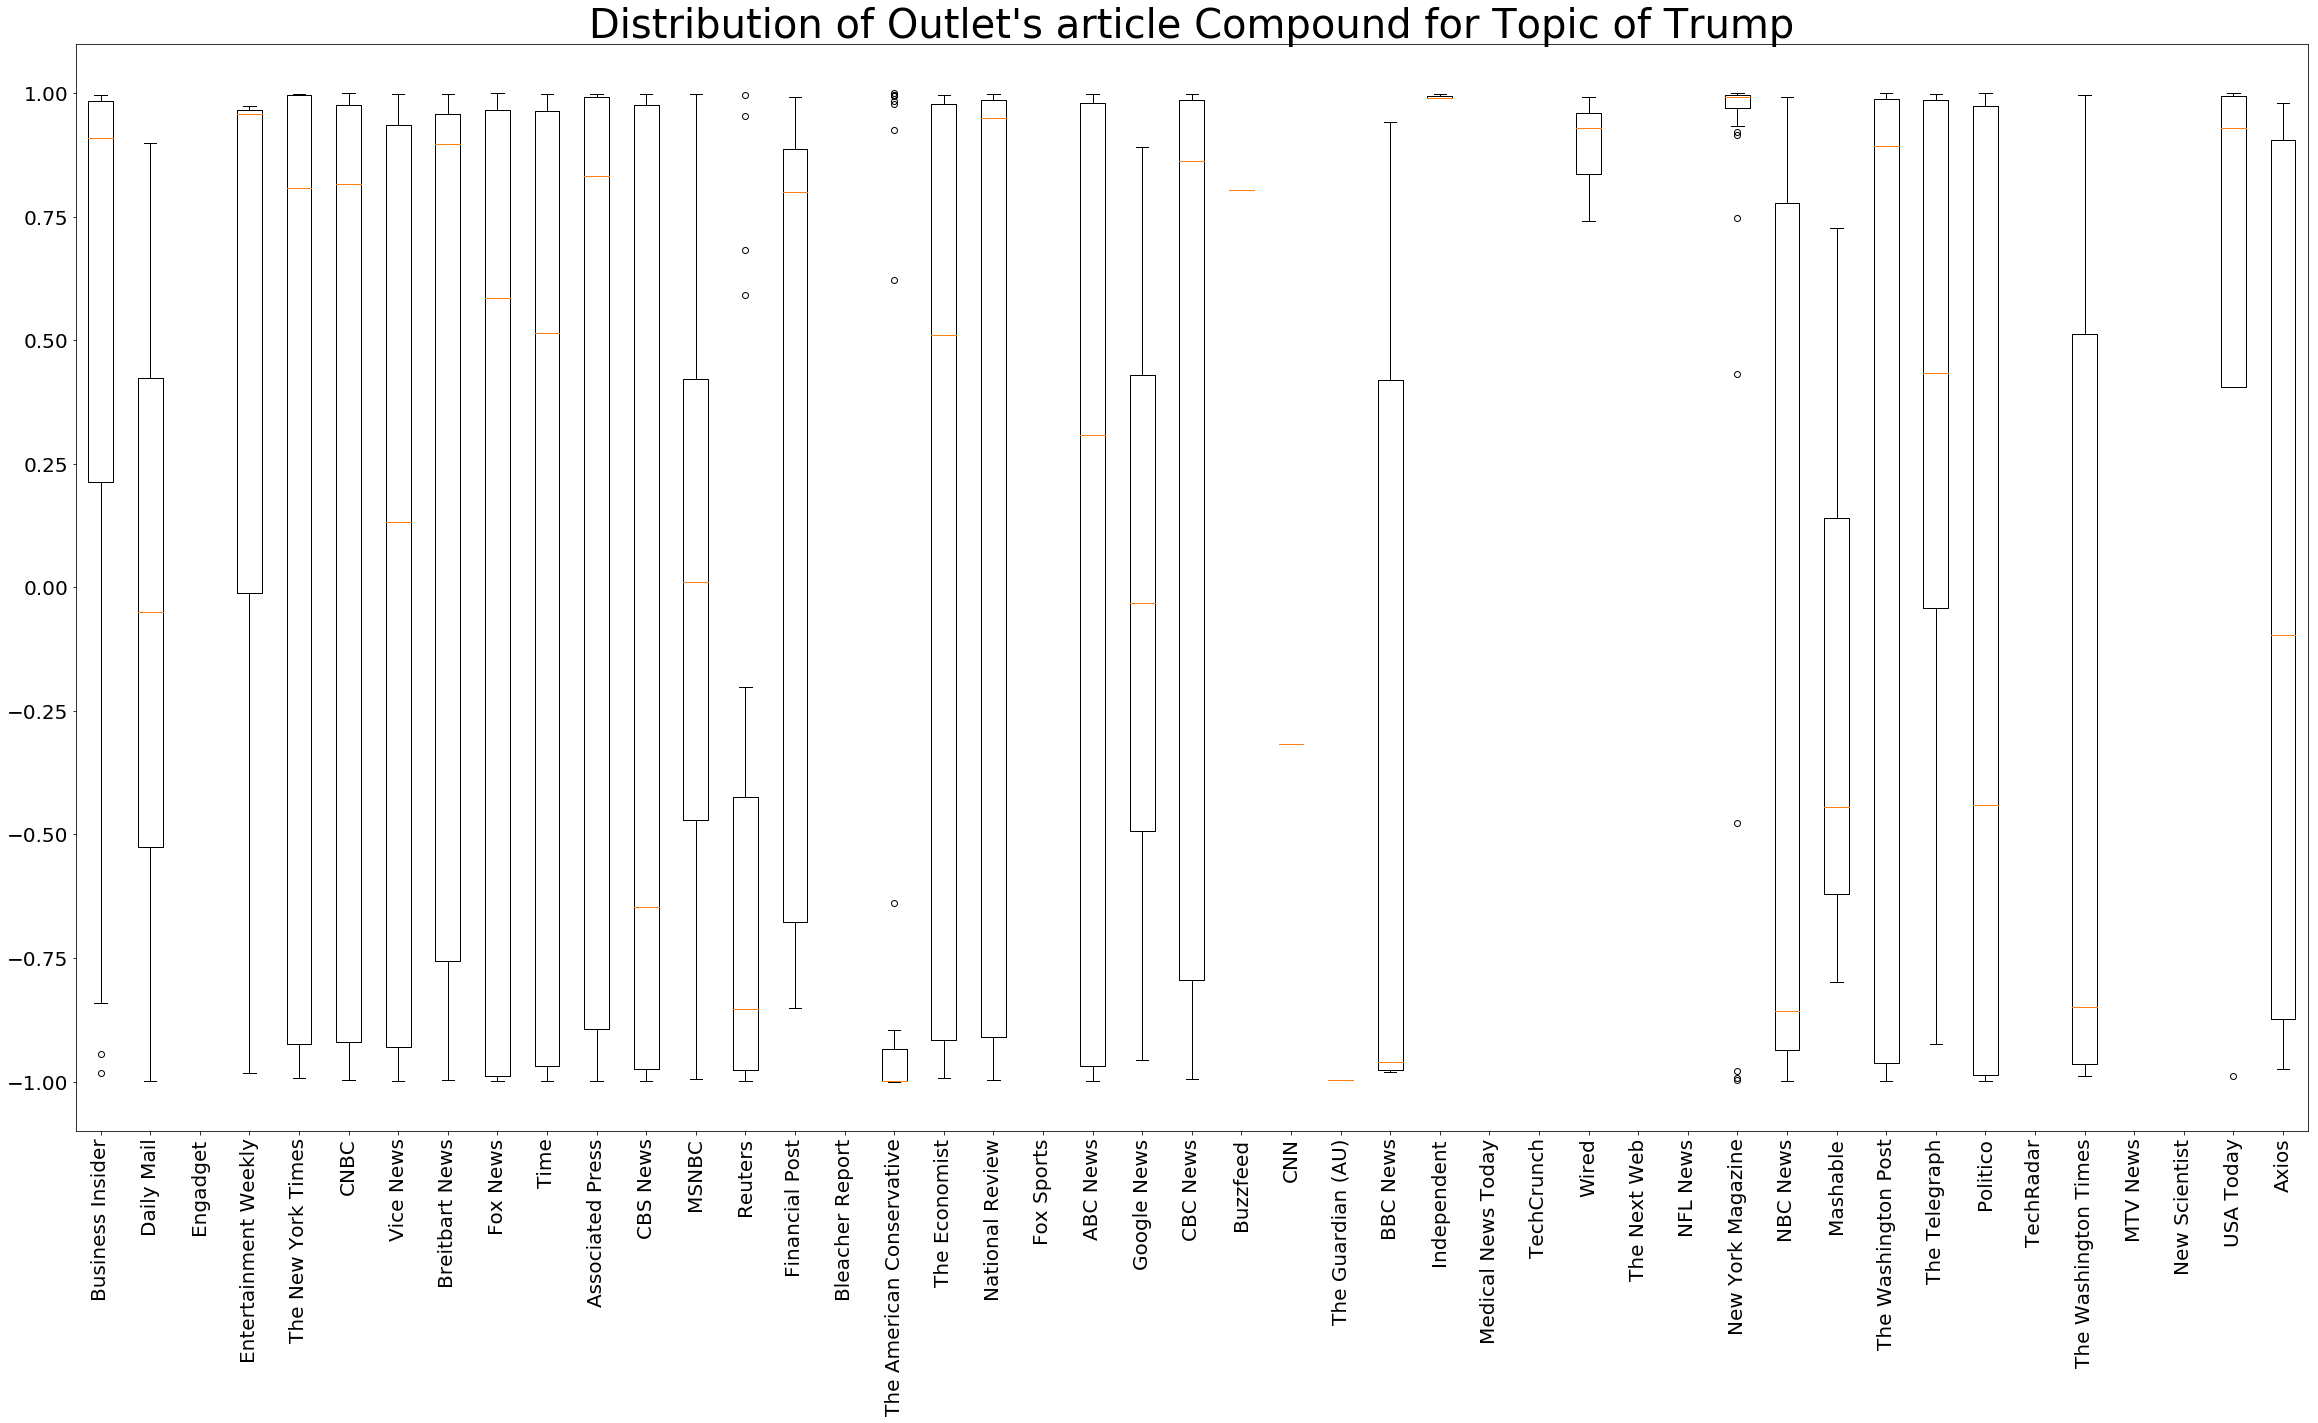

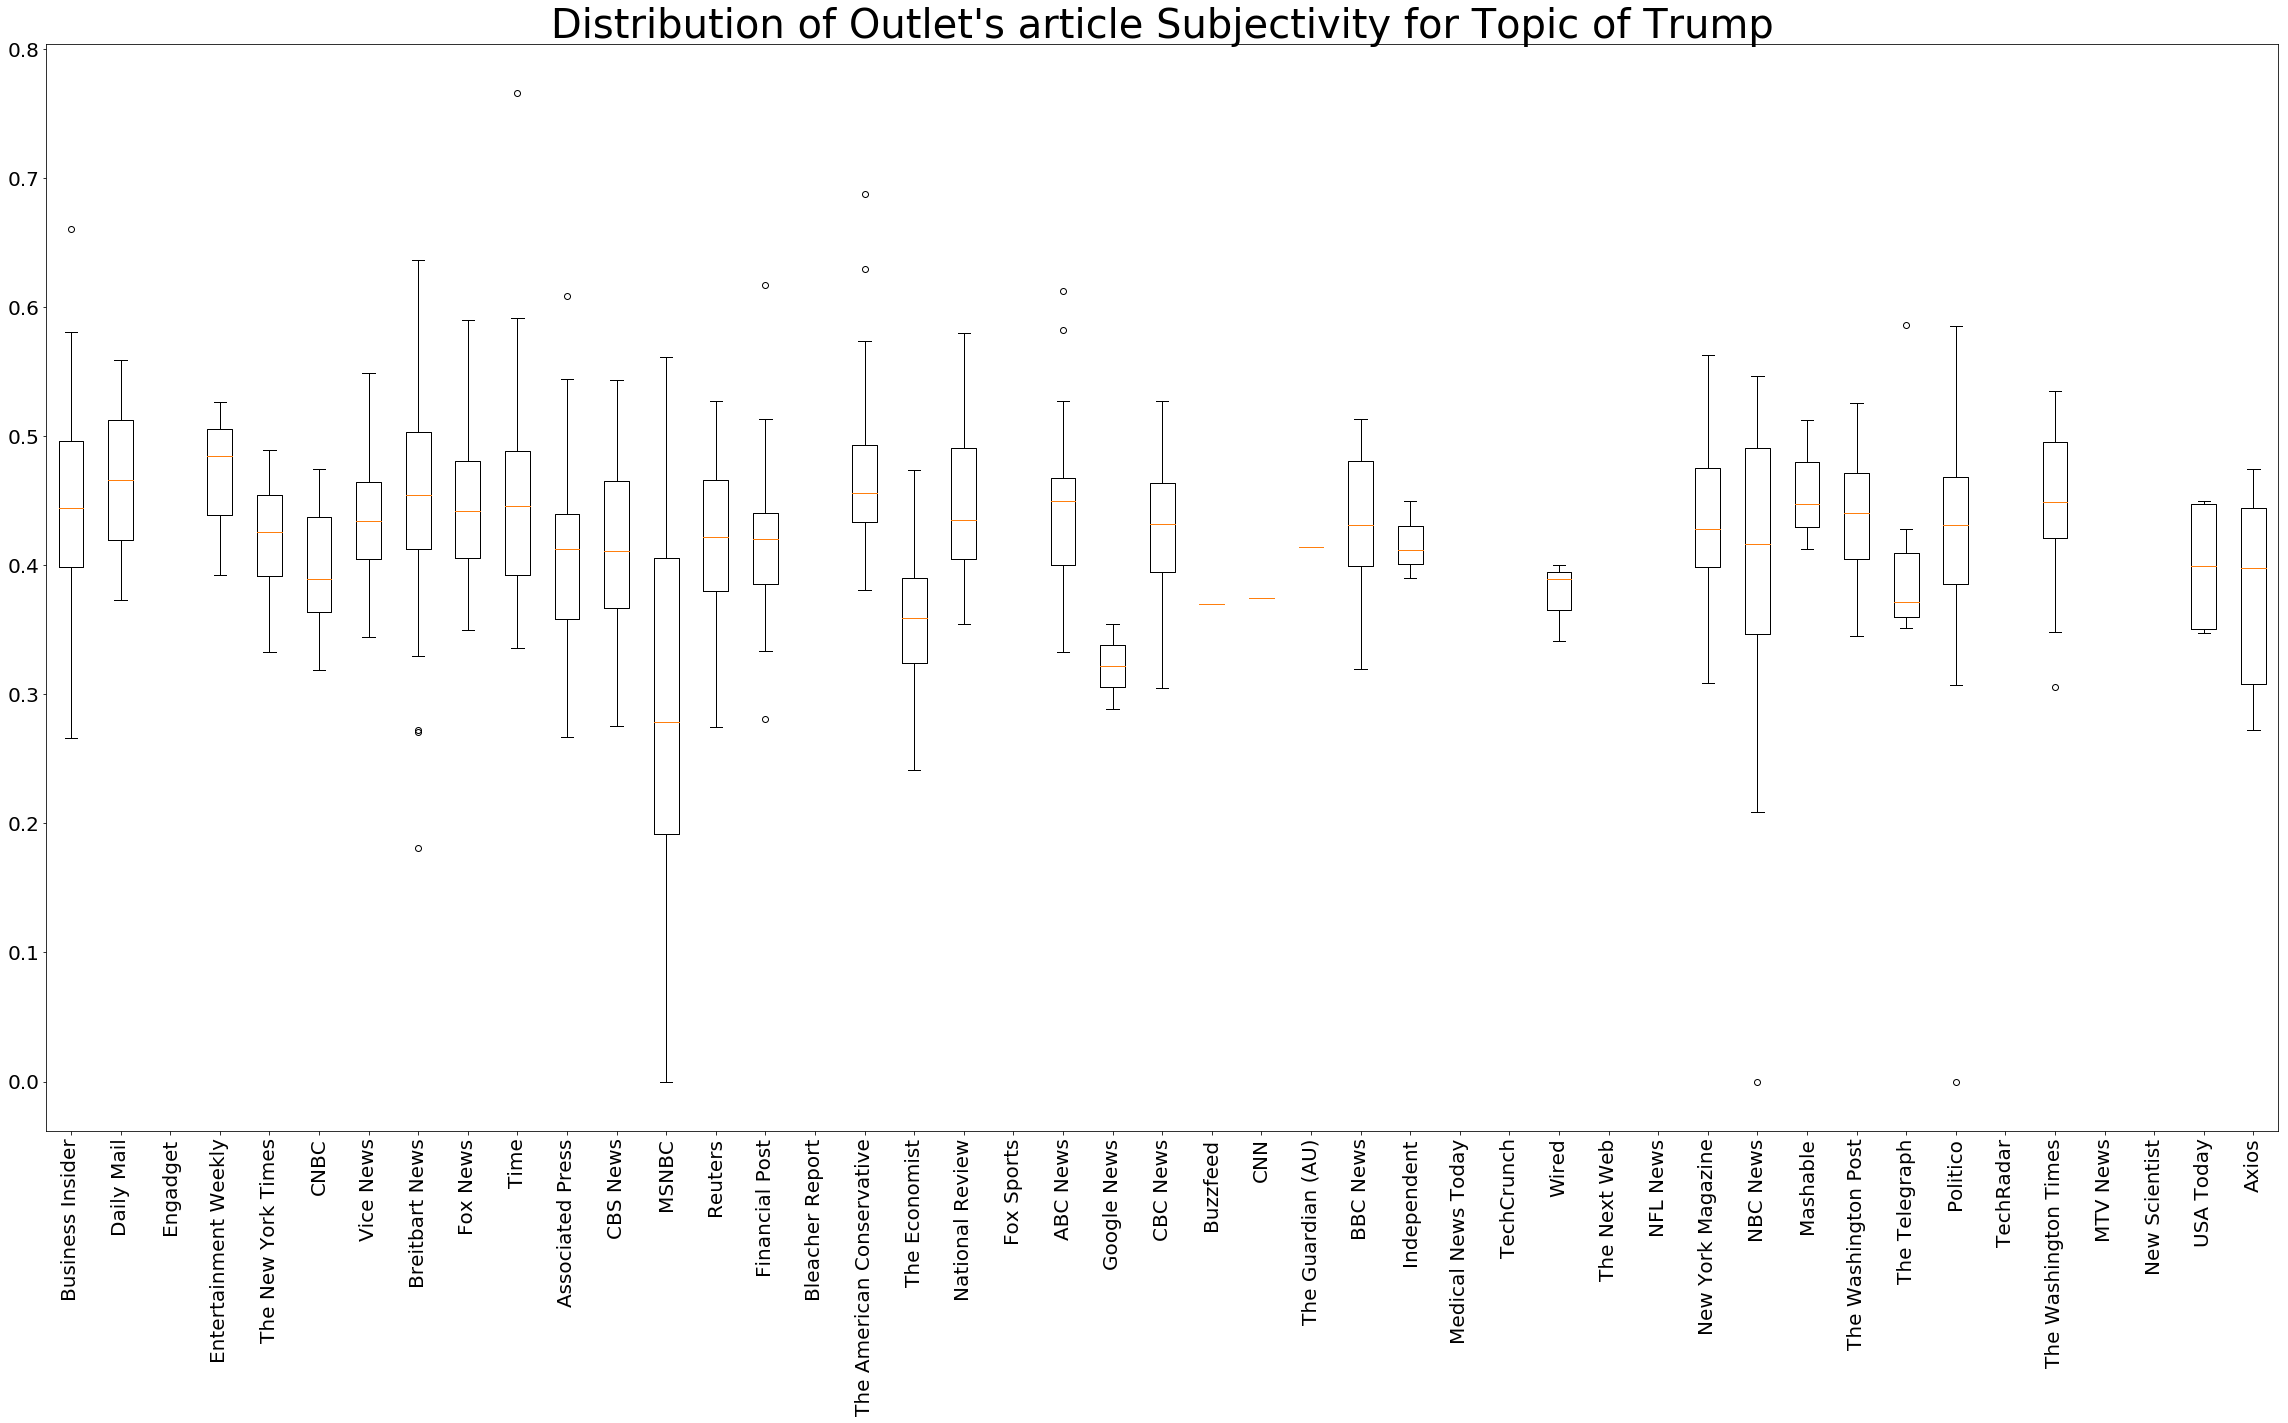

In [264]:
plot_metrics_vs_topics(df,'pos','Positivity', 45, 'Trump')
plot_metrics_vs_topics(df,'neg','Negativity', 45, 'Trump')
plot_metrics_vs_topics(df,'compound','Compound', 45, 'Trump')
plot_metrics_vs_topics(df,'subjectivity','Subjectivity', 45, 'Trump')

In [61]:
#  from sklearn.metrics.pairwise import cosine_similarity
# cosine_similarity([test], [test2])
# # array([[-0.5]])

# # np.shape(cosine_similarity(test, test2))

array([[0.5497319]], dtype=float32)